<a href="https://colab.research.google.com/github/jamartinezv2020/DITE/blob/main/optimiza09092024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Intalación de libererías requeridas***

In [1]:
pip install streamlit sympy matplotlib fpdf


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.8 MB/s eta 0:00:00
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=3efee38c53e60d97f36fa38ed340698c6d36db2a547c062bf5fb9b2ce54ce10e
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify
from fpdf import FPDF

# Crear una clase PDF para generar los documentos con los resultados
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Método de Optimización y Aproximación a la Raíz', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(4)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_plot(self, image_path):
        self.image(image_path, x=10, y=self.get_y(), w=180)
        self.ln(85)

# Función para generar el documento PDF
def generar_pdf(titulo, cuerpo, imagen_path, autor='José Alfredo Martínez Valdés'):
    pdf = PDF()
    pdf.set_title(titulo)
    pdf.add_page()
    pdf.chapter_title(titulo)
    pdf.chapter_body(cuerpo)
    if imagen_path:
        pdf.add_plot(imagen_path)
    pdf.output(f"{titulo}.pdf")
    st.success(f"Documento '{titulo}.pdf' generado exitosamente.")

# Función de Bisección
def metodo_biseccion(func, a, b, tol, max_iter):
    x = symbols('x')
    f = lambdify(x, func)
    iter_count = 0
    error = abs(b - a)
    resultados = []

    while error > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        error = abs(b - a)
        iter_count += 1
        resultados.append((iter_count, a, b, error))

    # Graficar los resultados
    fig, ax = plt.subplots()
    x_vals = np.linspace(a, b, 100)
    y_vals = f(x_vals)
    ax.plot(x_vals, y_vals, label='Función')
    ax.axhline(0, color='black', lw=0.5)
    ax.scatter(c, f(c), color='red', label='Raíz encontrada')
    ax.legend()
    ax.set_title("Gráfico de la Función")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    plt_path = "biseccion_plot.png"
    fig.savefig(plt_path)
    st.pyplot(fig)

    # Mostrar resultados en la interfaz
    st.write("Iteración | a | b | Error")
    for res in resultados:
        st.write(f"{res[0]} | {res[1]:.5f} | {res[2]:.5f} | {res[3]:.5f}")

    # Generar PDF con los resultados
    cuerpo = f"Resultados del método de Bisección:\nIteraciones: {iter_count}\nError Final: {error:.5f}\n"
    for res in resultados:
        cuerpo += f"Iteración {res[0]}: a={res[1]}, b={res[2]}, Error={res[3]}\n"
    generar_pdf("Método Bisección", cuerpo, plt_path)

# Función principal con Streamlit
def main():
    st.title("Métodos de Optimización y Aproximación a la Raíz")
    st.write("Seleccione un método para encontrar la raíz de una función dada.")

    # Selección del método
    metodo = st.selectbox("Seleccione un método:",
                          ["Bisección", "Newton-Raphson", "Punto Fijo",
                           "Razón Dorada", "Interpolación Cuadrática",
                           "Falsa Posición", "Newton", "Búsqueda Aleatoria"])

    # Entrada de la función
    func_input = st.text_input("Ingrese la función (ejemplo: x**2 - 4):", "x**2 - 4")
    func = symbols('x')
    parsed_func = eval(func_input, {'x': func, 'np': np})

    # Configurar los parámetros específicos para cada método
    if metodo == "Bisección":
        a = st.number_input("Ingrese el límite inferior (a):", value=-10.0)
        b = st.number_input("Ingrese el límite superior (b):", value=10.0)
        tol = st.number_input("Ingrese la tolerancia:", value=0.001)
        max_iter = st.number_input("Ingrese el máximo de iteraciones:", value=50, step=1)
        if st.button("Ejecutar Método"):
            metodo_biseccion(parsed_func, a, b, tol, max_iter)

    # Agregar la lógica para otros métodos aquí

if __name__ == "__main__":
    main()


2024-09-10 00:58:40.468 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-10 00:58:40.882 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-10 00:58:40.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-10 00:58:40.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-10 00:58:40.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-10 00:58:40.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-10 00:58:40.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-10 00:58:40.923 Thread 'MainThread': mi

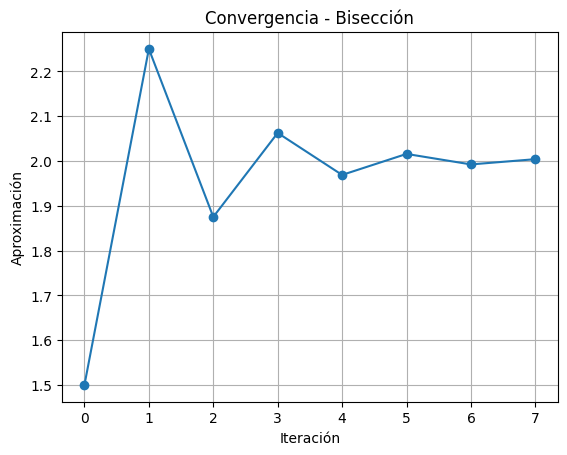

Raíz aproximada (Bisección): 1.998046875


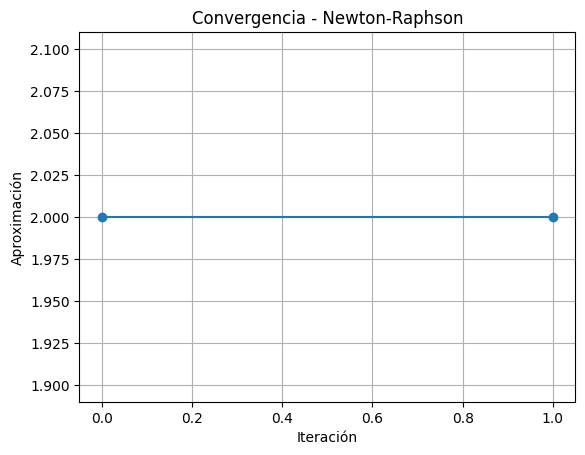

Raíz aproximada (Newton-Raphson): 2


KeyboardInterrupt: 

In [1]:
from abc import ABC, abstractmethod
from typing import List, Callable, Optional, Tuple
import matplotlib.pyplot as plt
import numpy as np

# Interfaz para métodos numéricos
class MetodoNumerico(ABC):
    @abstractmethod
    def encontrar_raiz(self) -> Optional[float]:
        pass

# Método de Bisección
class Biseccion(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], a: float, b: float, tol: float):
        self.func = func
        self.a = a
        self.b = b
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        a, b = self.a, self.b
        if self.func(a) * self.func(b) >= 0:
            print("La función no cambia de signo en el intervalo dado.")
            return None
        iteraciones = []
        while (b - a) / 2.0 > self.tol:
            c = (a + b) / 2.0
            iteraciones.append(c)
            if self.func(c) == 0:
                break
            elif self.func(a) * self.func(c) < 0:
                b = c
            else:
                a = c
        self.plot_iterations(iteraciones, "Bisección")
        return (a + b) / 2.0

    def plot_iterations(self, iterations: List[float], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Aproximación')
        plt.grid(True)
        plt.show()

# Método de Newton-Raphson
class NewtonRaphson(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], dfunc: Callable[[float], float], x0: float, tol: float):
        self.func = func
        self.dfunc = dfunc
        self.x0 = x0
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        x = self.x0
        iteraciones = [x]
        while True:
            x_new = x - self.func(x) / self.dfunc(x)
            iteraciones.append(x_new)
            if abs(x_new - x) < self.tol:
                break
            x = x_new
        self.plot_iterations(iteraciones, "Newton-Raphson")
        return x

    def plot_iterations(self, iterations: List[float], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Aproximación')
        plt.grid(True)
        plt.show()

# Método de Sección Áurea
class SeccionAurea(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], a: float, b: float, tol: float):
        self.func = func
        self.a = a
        self.b = b
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        a, b = self.a, self.b
        phi = (1 + np.sqrt(5)) / 2
        c = b - (b - a) / phi
        d = a + (b - a) / phi
        iteraciones = []

        while abs(b - a) > self.tol:
            iteraciones.append((a + b) / 2)
            if self.func(c) < self.func(d):
                b = d
            else:
                a = c
            c = b - (b - a) / phi
            d = a + (b - a) / phi

        self.plot_iterations(iteraciones, "Sección Áurea")
        return (b + a) / 2

    def plot_iterations(self, iterations: List[float], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Aproximación')
        plt.grid(True)
        plt.show()

# Método de Interpolación Cuadrática
class InterpolacionCuadratica(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], x0: float, x1: float, x2: float, tol: float):
        self.func = func
        self.x0 = x0
        self.x1 = x1
        self.x2 = x2
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        x0, x1, x2 = self.x0, self.x1, self.x2
        iteraciones = [x0, x1, x2]
        while True:
            f0, f1, f2 = self.func(x0), self.func(x1), self.func(x2)
            L0 = (x1 - x2) / ((x0 - x1) * (x0 - x2))
            L1 = (x0 - x2) / ((x1 - x0) * (x1 - x2))
            L2 = (x0 - x1) / ((x2 - x0) * (x2 - x1))
            c = f0 * L0 + f1 * L1 + f2 * L2
            x3 = x2 - 2 * c / (f1 - f2)
            iteraciones.append(x3)
            if abs(x3 - x2) < self.tol:
                break
            x0, x1, x2 = x1, x2, x3
        self.plot_iterations(iteraciones, "Interpolación Cuadrática")
        return x3

    def plot_iterations(self, iterations: List[float], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Aproximación')
        plt.grid(True)
        plt.show()

# Método de Punto Fijo
class PuntoFijo(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], gfunc: Callable[[float], float], x0: float, tol: float):
        self.func = func
        self.gfunc = gfunc
        self.x0 = x0
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        x = self.x0
        iteraciones = [x]
        while True:
            x_new = self.gfunc(x)
            iteraciones.append(x_new)
            if abs(x_new - x) < self.tol:
                break
            x = x_new
        self.plot_iterations(iteraciones, "Punto Fijo")
        return x

    def plot_iterations(self, iterations: List[float], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Aproximación')
        plt.grid(True)
        plt.show()

# Método de Falsa Posición
class FalsaPosicion(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], a: float, b: float, tol: float):
        self.func = func
        self.a = a
        self.b = b
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        a, b = self.a, self.b
        if self.func(a) * self.func(b) >= 0:
            print("La función no cambia de signo en el intervalo dado.")
            return None
        iteraciones = []
        while abs(b - a) > self.tol:
            c = b - (self.func(b) * (b - a)) / (self.func(b) - self.func(a))
            iteraciones.append(c)
            if self.func(c) == 0 or abs(self.func(c)) < self.tol:
                break
            elif self.func(a) * self.func(c) < 0:
                b = c
            else:
                a = c
        self.plot_iterations(iteraciones, "Falsa Posición")
        return c

    def plot_iterations(self, iterations: List[float], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Aproximación')
        plt.grid(True)
        plt.show()

# Método de Búsqueda Binaria
class BusquedaBinaria(MetodoNumerico):
    def __init__(self, arr: List[int], target: int):
        self.arr = arr
        self.target = target

    def encontrar_raiz(self) -> Optional[int]:
        left, right = 0, len(self.arr) - 1
        iteraciones = []
        while left <= right:
            mid = (left + right) // 2
            iteraciones.append(mid)
            if self.arr[mid] == self.target:
                self.plot_iterations(iteraciones, "Búsqueda Binaria")
                return mid
            elif self.arr[mid] < self.target:
                left = mid + 1
            else:
                right = mid - 1
        self.plot_iterations(iteraciones, "Búsqueda Binaria")
        return None

    def plot_iterations(self, iterations: List[int], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Índice')
        plt.grid(True)
        plt.show()

# Método de Newton (Generalizado)
class MetodoNewton(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], x0: float, tol: float):
        self.func = func
        self.x0 = x0
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        x = self.x0
        iteraciones = [x]
        while True:
            dfunc = self.derivar(self.func)
            x_new = x - self.func(x) / dfunc(x)
            iteraciones.append(x_new)
            if abs(x_new - x) < self.tol:
                break
            x = x_new
        self.plot_iterations(iteraciones, "Newton")
        return x

    def derivar(self, func: Callable[[float], float], h: float = 1e-5) -> Callable[[float], float]:
        return lambda x: (func(x + h) - func(x - h)) / (2 * h)

    def plot_iterations(self, iterations: List[float], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Aproximación')
        plt.grid(True)
        plt.show()

# Ejemplo de uso de los métodos implementados
def main():
    # Definir funciones para pruebas
    funcion = lambda x: x**2 - 4
    derivada = lambda x: 2*x
    gfunc = lambda x: (x**2 - 4) / 2  # Función para Punto Fijo

    # Método de Bisección
    metodo_biseccion = Biseccion(func=funcion, a=0, b=3, tol=0.01)
    raiz_biseccion = metodo_biseccion.encontrar_raiz()
    if raiz_biseccion is not None:
        print(f"Raíz aproximada (Bisección): {raiz_biseccion}")

    # Método de Newton-Raphson
    metodo_newton = NewtonRaphson(func=funcion, dfunc=derivada, x0=2, tol=0.01)
    raiz_newton = metodo_newton.encontrar_raiz()
    if raiz_newton is not None:
        print(f"Raíz aproximada (Newton-Raphson): {raiz_newton}")

    # Método de Punto Fijo
    metodo_punto_fijo = PuntoFijo(func=funcion, gfunc=gfunc, x0=2, tol=0.01)
    raiz_punto_fijo = metodo_punto_fijo.encontrar_raiz()
    if raiz_punto_fijo is not None:
        print(f"Raíz aproximada (Punto Fijo): {raiz_punto_fijo}")

    # Método de Falsa Posición
    metodo_falsa_posicion = FalsaPosicion(func=funcion, a=0, b=3, tol=0.01)
    raiz_falsa_posicion = metodo_falsa_posicion.encontrar_raiz()
    if raiz_falsa_posicion is not None:
        print(f"Raíz aproximada (Falsa Posición): {raiz_falsa_posicion}")

    # Método de Interpolación Cuadrática
    metodo_interpolacion = InterpolacionCuadratica(func=funcion, x0=0, x1=1, x2=2, tol=0.01)
    raiz_interpolacion = metodo_interpolacion.encontrar_raiz()
    if raiz_interpolacion is not None:
        print(f"Raíz aproximada (Interpolación Cuadrática): {raiz_interpolacion}")

    # Método de Búsqueda Binaria
    metodo_busqueda_binaria = BusquedaBinaria(arr=[1, 2, 3, 4, 5, 6], target=4)
    indice = metodo_busqueda_binaria.encontrar_raiz()
    if indice is not None:
        print(f"Índice del elemento encontrado (Búsqueda Binaria): {indice}")

    # Método de Newton Generalizado
    metodo_newton_generalizado = MetodoNewton(func=funcion, x0=2, tol=0.01)
    raiz_newton_generalizado = metodo_newton_generalizado.encontrar_raiz()
    if raiz_newton_generalizado is not None:
        print(f"Raíz aproximada (Newton Generalizado): {raiz_newton_generalizado}")

if __name__ == "__main__":
    main()



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List, Optional

# Clase base para todos los métodos numéricos
class MetodoNumerico:
    def encontrar_raiz(self) -> Optional[float]:
        pass

    def plot_iterations(self, iterations: List[float], metodo: str):
        plt.plot(iterations, marker='o')
        plt.title(f'Convergencia - {metodo}')
        plt.xlabel('Iteración')
        plt.ylabel('Aproximación')
        plt.grid(True)
        plt.show()

# Implementación de los métodos numéricos
# Aquí se incluyen las clases previamente definidas para cada método.

# Método de Bisección
class Biseccion(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], a: float, b: float, tol: float):
        self.func = func
        self.a = a
        self.b = b
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        a, b = self.a, self.b
        if self.func(a) * self.func(b) >= 0:
            print("La función no cambia de signo en el intervalo dado.")
            return None
        iteraciones = []
        while abs(b - a) > self.tol:
            c = (a + b) / 2
            iteraciones.append(c)
            if self.func(c) == 0 or abs(self.func(c)) < self.tol:
                break
            elif self.func(a) * self.func(c) < 0:
                b = c
            else:
                a = c
        self.plot_iterations(iteraciones, "Bisección")
        return c

# Método de Newton-Raphson
class NewtonRaphson(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], dfunc: Callable[[float], float], x0: float, tol: float):
        self.func = func
        self.dfunc = dfunc
        self.x0 = x0
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        x = self.x0
        iteraciones = [x]
        while True:
            x_new = x - self.func(x) / self.dfunc(x)
            iteraciones.append(x_new)
            if abs(x_new - x) < self.tol:
                break
            x = x_new
        self.plot_iterations(iteraciones, "Newton-Raphson")
        return x

# Método de Punto Fijo
class PuntoFijo(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], gfunc: Callable[[float], float], x0: float, tol: float):
        self.func = func
        self.gfunc = gfunc
        self.x0 = x0
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        x = self.x0
        iteraciones = [x]
        while True:
            x_new = self.gfunc(x)
            iteraciones.append(x_new)
            if abs(x_new - x) < self.tol:
                break
            x = x_new
        self.plot_iterations(iteraciones, "Punto Fijo")
        return x

# Método de Falsa Posición
class FalsaPosicion(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], a: float, b: float, tol: float):
        self.func = func
        self.a = a
        self.b = b
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        a, b = self.a, self.b
        if self.func(a) * self.func(b) >= 0:
            print("La función no cambia de signo en el intervalo dado.")
            return None
        iteraciones = []
        while abs(b - a) > self.tol:
            c = b - (self.func(b) * (b - a)) / (self.func(b) - self.func(a))
            iteraciones.append(c)
            if self.func(c) == 0 or abs(self.func(c)) < self.tol:
                break
            elif self.func(a) * self.func(c) < 0:
                b = c
            else:
                a = c
        self.plot_iterations(iteraciones, "Falsa Posición")
        return c

# Método de Interpolación Cuadrática
class InterpolacionCuadratica(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], x0: float, x1: float, x2: float, tol: float):
        self.func = func
        self.x0 = x0
        self.x1 = x1
        self.x2 = x2
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        x0, x1, x2 = self.x0, self.x1, self.x2
        iteraciones = [x0, x1, x2]
        while True:
            f0, f1, f2 = self.func(x0), self.func(x1), self.func(x2)
            L0 = (x1 - x2) / ((x0 - x1) * (x0 - x2))
            L1 = (x0 - x2) / ((x1 - x0) * (x1 - x2))
            L2 = (x0 - x1) / ((x2 - x0) * (x2 - x1))
            c = f0 * L0 + f1 * L1 + f2 * L2
            x3 = x2 - 2 * c / (f1 - f2)
            iteraciones.append(x3)
            if abs(x3 - x2) < self.tol:
                break
            x0, x1, x2 = x1, x2, x3
        self.plot_iterations(iteraciones, "Interpolación Cuadrática")
        return x3

# Método de Newton Generalizado
class MetodoNewton(MetodoNumerico):
    def __init__(self, func: Callable[[float], float], x0: float, tol: float):
        self.func = func
        self.x0 = x0
        self.tol = tol

    def encontrar_raiz(self) -> Optional[float]:
        x = self.x0
        iteraciones = [x]
        while True:
            dfunc = self.derivar(self.func)
            x_new = x - self.func(x) / dfunc(x)
            iteraciones.append(x_new)
            if abs(x_new - x) < self.tol:
                break
            x = x_new
        self.plot_iterations(iteraciones, "Newton Generalizado")
        return x

    def derivar(self, func: Callable[[float], float], h: float = 1e-5) -> Callable[[float], float]:
        return lambda x: (func(x + h) - func(x - h)) / (2 * h)

# Menú interactivo para seleccionar y ejecutar métodos numéricos
def menu():
    while True:
        print("\n--- Selecciona un Método Numérico ---")
        print("1. Bisección")
        print("2. Newton-Raphson")
        print("3. Punto Fijo")
        print("4. Falsa Posición")
        print("5. Interpolación Cuadrática")
        print("6. Newton Generalizado")
        print("0. Salir")

        opcion = input("Selecciona una opción: ")

        if opcion == '1':
            ejecutar_biseccion()
        elif opcion == '2':
            ejecutar_newton_raphson()
        elif opcion == '3':
            ejecutar_punto_fijo()
        elif opcion == '4':
            ejecutar_falsa_posicion()
        elif opcion == '5':
            ejecutar_interpolacion_cuadratica()
        elif opcion == '6':
            ejecutar_newton_generalizado()
        elif opcion == '0':
            print("Saliendo...")
            break
        else:
            print("Opción no válida, intenta de nuevo.")

# Funciones para ejecutar cada método solicitando sus parámetros
def solicitar_funcion():
    # Solicita al usuario una función como cadena de texto y la convierte a una función evaluable
    import sympy as sp
    x = sp.symbols('x')
    expr = sp.sympify(input("Introduce la función f(x): "))
    return sp.lambdify(x, expr), expr

def solicitar_derivada(expr):
    # Calcula la derivada simbólica de una función
    import sympy as sp
    x = sp.symbols('x')
    d_expr = sp.diff(expr, x)
    return sp.lambdify(x, d_expr), d_expr

def ejecutar_biseccion():
    func, expr = solicitar_funcion()
    a = float(input("Introduce el límite inferior a: "))
    b = float(input("Introduce el límite superior b: "))
    tol = float(input("Introduce la tolerancia: "))
    metodo = Biseccion(func, a, b, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Bisección): {raiz}")

def ejecutar_newton_raphson():
    func, expr = solicitar_funcion()
    dfunc, d_expr = solicitar_derivada(expr)
    x0 = float(input("Introduce el valor inicial x0: "))
    tol = float(input("Introduce la tolerancia: "))
    metodo = NewtonRaphson(func, dfunc, x0, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Newton-Raphson): {raiz}")

def ejecutar_punto_fijo():
    func, _ = solicitar_funcion()
    gfunc, _ = solicitar_funcion()  # g(x) en este caso
    x0 = float(input("Introduce el valor inicial x0: "))
    tol = float(input("Introduce la tolerancia: "))
    metodo = PuntoFijo(func, gfunc, x0, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Punto Fijo): {raiz}")

def ejecutar_falsa_posicion():
    func, _ = solicitar_funcion()
    a = float(input("Introduce el límite inferior a: "))
    b = float(input("Introduce el límite superior b: "))
    tol = float(input("Introduce la tolerancia: "))
    metodo = FalsaPosicion(func, a, b, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Falsa Posición): {raiz}")

def ejecutar_interpolacion_cuadratica():
    func, _ = solicitar_funcion()
    x0 = float(input("Introduce el primer punto x0: "))
    x1 = float(input("Introduce el segundo punto x1: "))
    x2 = float(input("Introduce el tercer punto x2: "))
    tol = float(input("Introduce la tolerancia: "))
    metodo = InterpolacionCuadratica(func, x0, x1, x2, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Interpolación Cuadrática): {raiz}")

def ejecutar_newton_generalizado():
    func, _ = solicitar_funcion()
    x0 = float(input("Introduce el valor inicial x0: "))
    tol = float(input("Introduce la tolerancia: "))
    metodo = MetodoNewton(func, x0, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Newton Generalizado): {raiz}")

if __name__ == "__main__":
    menu()



--- Selecciona un Método Numérico ---
1. Bisección
2. Newton-Raphson
3. Punto Fijo
4. Falsa Posición
5. Interpolación Cuadrática
6. Newton Generalizado
0. Salir
Selecciona una opción: 4
Introduce la función f(x): 3x^2+4x-16


SympifyError: Sympify of expression 'could not parse '3x^2+4x-16'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

Bienvenido al programa de métodos numéricos.

Selecciona un método:
1. Bisección
2. Newton-Raphson
3. Punto Fijo
4. Falsa Posición
5. Interpolación Cuadrática
6. Newton Generalizado
0. Salir
Introduce una opción (0-6): 1
Introduce la función f(x) (Ejemplo: x**2 - 4): x**2 - 4
Introduce el límite inferior a (Ejemplo: -10): -3
Introduce el límite superior b (Ejemplo: 10): 8
Introduce la tolerancia (Ejemplo: 0.001): 0.000005
La función no cambia de signo en el intervalo dado.
Raíz aproximada (Bisección): None
Introduce una opción (0-6): 5
Introduce la función f(x) (Ejemplo: x**2 - 4): 3*sin(x) -16
Introduce el primer punto x0 (Ejemplo: 0): -2
Introduce el segundo punto x1 (Ejemplo: 1): 12
Introduce el tercer punto x2 (Ejemplo: 2): 18
Introduce la tolerancia (Ejemplo: 0.001): 0.001


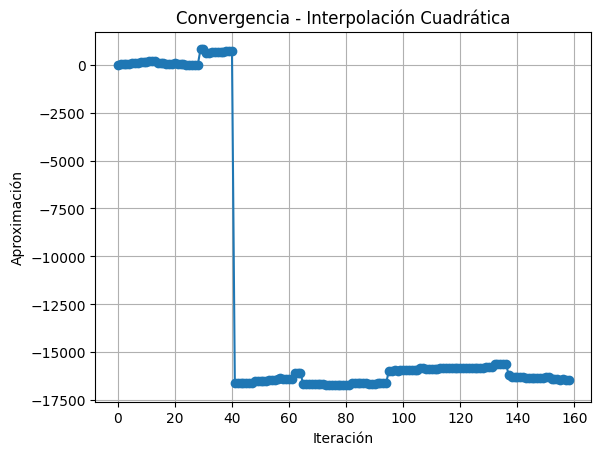

Raíz aproximada (Interpolación Cuadrática): -16460.51180334031


KeyboardInterrupt: Interrupted by user

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definición de clases y métodos aquí (mantén el código anterior de los métodos sin cambios)

def solicitar_float(mensaje: str, ejemplo: str) -> float:
    """
    Solicita un número flotante al usuario, mostrando un mensaje y un ejemplo.
    Valida que el valor ingresado sea un número válido.
    """
    while True:
        try:
            valor = float(input(f"{mensaje} (Ejemplo: {ejemplo}): "))
            return valor
        except ValueError:
            print("Por favor, introduce un número válido.")

def solicitar_funcion() -> tuple:
    """
    Solicita al usuario que introduzca una función matemática.
    """
    while True:
        try:
            funcion = input("Introduce la función f(x) (Ejemplo: x**2 - 4): ")
            expr = sp.sympify(funcion)
            x = sp.symbols('x')
            f = sp.lambdify(x, expr)
            # Validamos la función con un valor de prueba para evitar errores sintácticos
            f(1)
            return f, expr
        except (sp.SympifyError, ValueError):
            print("Error: Introduce una función válida en términos de x. Ejemplo: x**2 - 4.")

def solicitar_derivada(expr) -> tuple:
    """
    Solicita la derivada de la función ingresada.
    """
    x = sp.symbols('x')
    d_expr = sp.diff(expr, x)
    print(f"Derivada calculada automáticamente: {d_expr}")
    return sp.lambdify(x, d_expr), d_expr

def menu():
    print("Bienvenido al programa de métodos numéricos.\n")
    print("Selecciona un método:")
    print("1. Bisección")
    print("2. Newton-Raphson")
    print("3. Punto Fijo")
    print("4. Falsa Posición")
    print("5. Interpolación Cuadrática")
    print("6. Newton Generalizado")
    print("0. Salir")

    while True:
        opcion = input("Introduce una opción (0-6): ")
        if opcion == '0':
            print("Saliendo del programa.")
            break
        elif opcion == '1':
            ejecutar_biseccion()
        elif opcion == '2':
            ejecutar_newton_raphson()
        elif opcion == '3':
            ejecutar_punto_fijo()
        elif opcion == '4':
            ejecutar_falsa_posicion()
        elif opcion == '5':
            ejecutar_interpolacion_cuadratica()
        elif opcion == '6':
            ejecutar_newton_generalizado()
        else:
            print("Opción no válida. Introduce un número del 0 al 6.")

def ejecutar_biseccion():
    func, expr = solicitar_funcion()
    a = solicitar_float("Introduce el límite inferior a", "-10")
    b = solicitar_float("Introduce el límite superior b", "10")
    tol = solicitar_float("Introduce la tolerancia", "0.001")
    metodo = Biseccion(func, a, b, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Bisección): {raiz}")

def ejecutar_newton_raphson():
    func, expr = solicitar_funcion()
    dfunc, d_expr = solicitar_derivada(expr)
    x0 = solicitar_float("Introduce el valor inicial x0", "2")
    tol = solicitar_float("Introduce la tolerancia", "0.001")
    metodo = NewtonRaphson(func, dfunc, x0, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Newton-Raphson): {raiz}")

def ejecutar_punto_fijo():
    func, _ = solicitar_funcion()
    gfunc, _ = solicitar_funcion()  # g(x) en este caso
    x0 = solicitar_float("Introduce el valor inicial x0", "1.5")
    tol = solicitar_float("Introduce la tolerancia", "0.001")
    metodo = PuntoFijo(func, gfunc, x0, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Punto Fijo): {raiz}")

def ejecutar_falsa_posicion():
    func, _ = solicitar_funcion()
    a = solicitar_float("Introduce el límite inferior a", "0")
    b = solicitar_float("Introduce el límite superior b", "3")
    tol = solicitar_float("Introduce la tolerancia", "0.001")
    metodo = FalsaPosicion(func, a, b, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Falsa Posición): {raiz}")

def ejecutar_interpolacion_cuadratica():
    func, _ = solicitar_funcion()
    x0 = solicitar_float("Introduce el primer punto x0", "0")
    x1 = solicitar_float("Introduce el segundo punto x1", "1")
    x2 = solicitar_float("Introduce el tercer punto x2", "2")
    tol = solicitar_float("Introduce la tolerancia", "0.001")
    metodo = InterpolacionCuadratica(func, x0, x1, x2, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Interpolación Cuadrática): {raiz}")

def ejecutar_newton_generalizado():
    func, _ = solicitar_funcion()
    x0 = solicitar_float("Introduce el valor inicial x0", "0.5")
    tol = solicitar_float("Introduce la tolerancia", "0.001")
    metodo = MetodoNewton(func, x0, tol)
    raiz = metodo.encontrar_raiz()
    print(f"Raíz aproximada (Newton Generalizado): {raiz}")

if __name__ == "__main__":
    menu()


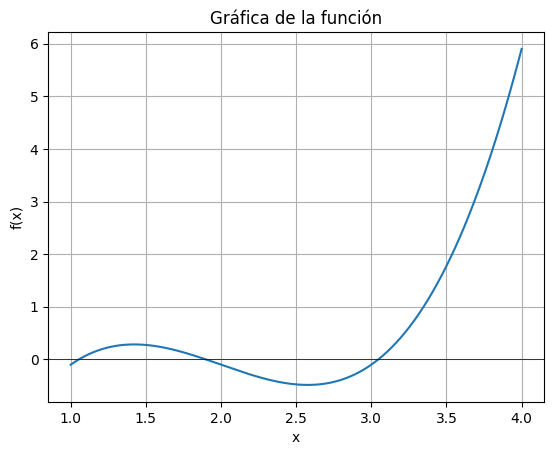

Error: f(2.0) = -0.09999999999999964 y f(3.0) = -0.09999999999999964 no tienen signos opuestos.
El intervalo no contiene una raíz


In [7]:
# Método de Bisección

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF

def bisection_method(f, a, b, tol, max_iter):
    """
    Realiza el método de bisección para encontrar la raíz de una función f.

    Args:
    f : function - La función de la cual se desea encontrar la raíz
    a : float - Extremo inferior del intervalo
    b : float - Extremo superior del intervalo
    tol : float - Tolerancia para el criterio de parada
    max_iter : int - Número máximo de iteraciones

    Returns:
    raiz : float - La raíz aproximada encontrada
    history : list - Lista con el historial de iteraciones
    """
    if f(a) * f(b) > 0:
        print(f"Error: f({a}) = {f(a)} y f({b}) = {f(b)} no tienen signos opuestos.")
        raise ValueError("El intervalo no contiene una raíz")

    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    error = np.inf
    raiz = (a + b) / 2.0

    while error > tol and iter_count < max_iter:
        raiz = (a + b) / 2.0
        history.append([iter_count, a, b, raiz, f(raiz), error])

        if f(raiz) == 0:
            break

        if f(a) * f(raiz) < 0:
            b = raiz
        else:
            a = raiz

        error = abs(b - a)
        iter_count += 1

    return raiz, history

def plot_function(f, a, b):
    """
    Grafica la función f en el intervalo [a, b].

    Args:
    f : function - La función a graficar
    a : float - Extremo inferior del intervalo
    b : float - Extremo superior del intervalo
    """
    x = np.linspace(a, b, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black',linewidth=0.5)
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Args:
    history : list - Historial de las iteraciones (contiene el error en cada iteración)
    """
    errors = [row[5] for row in history]  # El error está en la columna 5
    iterations = [row[0] for row in history]

    plt.figure()
    plt.plot(iterations, errors, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.show()

def generate_pdf_report(f, history, raiz, a, b):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método.

    Args:
    f : function - La función evaluada
    history : list - Historial de las iteraciones
    raiz : float - La raíz aproximada encontrada
    a : float - Extremo inferior del intervalo
    b : float - Extremo superior del intervalo
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Bisección", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Raíz encontrada: {raiz:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Intervalo de búsqueda: [{a}, {b}]", ln=True)

    # Tabla de datos
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    for row in history:
        iteracion, ai, bi, ri, fi, err = row
        pdf.cell(200, 10, txt=f"Iter {iteracion}: a={ai:.4f}, b={bi:.4f}, r={ri:.4f}, f(r)={fi:.4e}, error={err:.4e}", ln=True)

    # Guardar archivo
    pdf.output("bisection_report.pdf")
    print("Informe PDF generado: bisection_report.pdf")

def main():
    # Definir la función
    f = lambda x: x**3 - 6*x**2 + 11*x - 6.1

    # Parámetros
    a = 2.0
    b = 3.0
    tol = 1e-6
    max_iter = 100

    # Graficar la función para verificar visualmente el intervalo
    plot_function(f, a-1, b+1)  # Aumentamos el intervalo para visualizar mejor la función

    try:
        # Ejecutar el método
        raiz, history = bisection_method(f, a, b, tol, max_iter)

        # Mostrar resultados
        print(f"Raíz aproximada: {raiz}")

        # Graficar la función con la raíz encontrada
        plot_function(f, a, b)
        plot_error(history)

        # Generar PDF
        generate_pdf_report(f, history, raiz, a, b)

    except ValueError as ve:
        print(ve)

if __name__ == "__main__":
    main()


José Alfredo Marínez Valdés

10 de septiembre de 2024

1. **Bisección**


Ingrese la función. Ejemplo: para f(x) = x^3 - 6x^2 + 11x - 6.1, ingrese 'x**3 - 6*x**2 + 11*x - 6.1'
Función f(x): x**3 - 6*x**2 + 11*x - 6.1
Ingrese el extremo inferior del intervalo (a). Ejemplo: 2.0: 2.0
Ingrese el extremo superior del intervalo (b). Ejemplo: 3.0: 3.0
Ingrese la tolerancia. Ejemplo: 1e-6: 1e-6
Ingrese el número máximo de iteraciones. Ejemplo: 100: 100


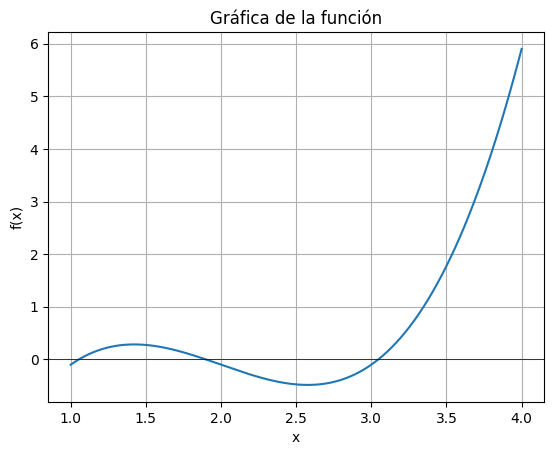

Error: f(2.0) = -0.09999999999999964 y f(3.0) = -0.09999999999999964 no tienen signos opuestos.
El intervalo no contiene una raíz


In [8]:
# Método de Bisección - Implementación interactiva
# Archivo: bisection_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF

def bisection_method(f, a, b, tol, max_iter):
    """
    Realiza el método de bisección para encontrar la raíz de una función f.

    Parámetros:
    f : function - La función de la cual se desea encontrar la raíz. Debe ser continua.
    a : float - Extremo inferior del intervalo. Se espera un número real.
    b : float - Extremo superior del intervalo. Se espera un número real.
    tol : float - Tolerancia para el criterio de parada. Se espera un número pequeño positivo, como 1e-6.
    max_iter : int - Número máximo de iteraciones permitidas. Se espera un entero.

    Retorna:
    raiz : float - La raíz aproximada encontrada.
    history : list - Lista con el historial de iteraciones (almacena iteración, extremos, raíz y error).

    Ejemplo:
    f = lambda x: x**2 - 4
    a = 0
    b = 3
    tol = 1e-6
    max_iter = 100
    """
    if f(a) * f(b) > 0:
        print(f"Error: f({a}) = {f(a)} y f({b}) = {f(b)} no tienen signos opuestos.")
        raise ValueError("El intervalo no contiene una raíz")

    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    error = np.inf
    raiz = (a + b) / 2.0

    while error > tol and iter_count < max_iter:
        raiz = (a + b) / 2.0
        history.append([iter_count, a, b, raiz, f(raiz), error])

        if f(raiz) == 0:
            break

        if f(a) * f(raiz) < 0:
            b = raiz
        else:
            a = raiz

        error = abs(b - a)
        iter_count += 1

    return raiz, history

def plot_function(f, a, b):
    """
    Grafica la función f en el intervalo [a, b].

    Parámetros:
    f : function - La función a graficar.
    a : float - Extremo inferior del intervalo.
    b : float - Extremo superior del intervalo.
    """
    x = np.linspace(a, b, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black',linewidth=0.5)
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).
    """
    errors = [row[5] for row in history]  # El error está en la columna 5
    iterations = [row[0] for row in history]

    plt.figure()
    plt.plot(iterations, errors, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.show()

def generate_pdf_report(f, history, raiz, a, b):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método.

    Parámetros:
    f : function - La función evaluada.
    history : list - Historial de las iteraciones.
    raiz : float - La raíz aproximada encontrada.
    a : float - Extremo inferior del intervalo.
    b : float - Extremo superior del intervalo.

    Retorno:
    Genera un archivo PDF "bisection_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Bisección", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Raíz encontrada: {raiz:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Intervalo de búsqueda: [{a}, {b}]", ln=True)

    # Tabla de datos
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    for row in history:
        iteracion, ai, bi, ri, fi, err = row
        pdf.cell(200, 10, txt=f"Iter {iteracion}: a={ai:.4f}, b={bi:.4f}, r={ri:.4f}, f(r)={fi:.4e}, error={err:.4e}", ln=True)

    # Guardar archivo
    pdf.output("bisection_report.pdf")
    print("Informe PDF generado: bisection_report.pdf")

def ingresar_datos():
    """
    Función para ingresar los datos de la función y los parámetros del método de bisección.
    """
    print("Ingrese la función. Ejemplo: para f(x) = x^3 - 6x^2 + 11x - 6.1, ingrese 'x**3 - 6*x**2 + 11*x - 6.1'")
    func_input = input("Función f(x): ")
    f = eval(f"lambda x: {func_input}")  # Crear función a partir de la entrada del usuario

    a = float(input("Ingrese el extremo inferior del intervalo (a). Ejemplo: 2.0: "))
    b = float(input("Ingrese el extremo superior del intervalo (b). Ejemplo: 3.0: "))
    tol = float(input("Ingrese la tolerancia. Ejemplo: 1e-6: "))
    max_iter = int(input("Ingrese el número máximo de iteraciones. Ejemplo: 100: "))

    return f, a, b, tol, max_iter

def main():
    """
    Función principal que ejecuta el método de bisección interactivo.
    """
    # Ingresar los parámetros interactivos
    f, a, b, tol, max_iter = ingresar_datos()

    # Graficar la función para verificar visualmente el intervalo
    plot_function(f, a-1, b+1)  # Aumentamos el intervalo para visualizar mejor la función

    try:
        # Ejecutar el método
        raiz, history = bisection_method(f, a, b, tol, max_iter)

        # Mostrar resultados
        print(f"Raíz aproximada: {raiz}")

        # Graficar la función con la raíz encontrada
        plot_function(f, a, b)
        plot_error(history)

        # Generar PDF
        generate_pdf_report(f, history, raiz, a, b)

    except ValueError as ve:
        print(ve)

if __name__ == "__main__":
    main()


**Newton Raphson**


Ingrese la función. Ejemplo: para f(x) = x^3 - 6x^2 + 11x - 6.1, ingrese 'x**3 - 6*x**2 + 11*x - 6.1'
Función f(x): x**3 - 6*x**2 + 11*x - 6.1
Ingrese el valor inicial x0. Ejemplo: 3.0: 3.0
Ingrese la tolerancia. Ejemplo: 1e-6: 1e-4
Ingrese el número máximo de iteraciones. Ejemplo: 50: 50


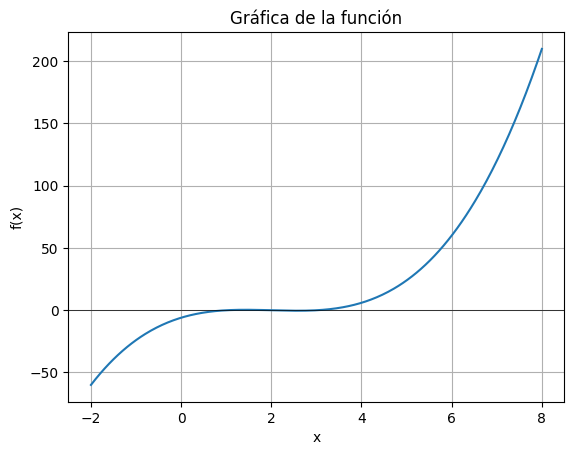

Raíz aproximada: 3.046680532114649


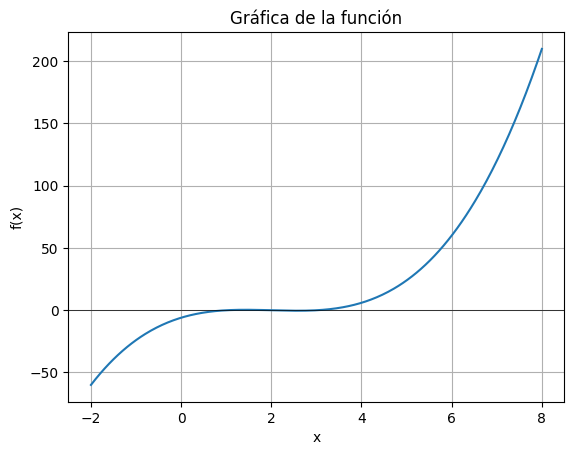

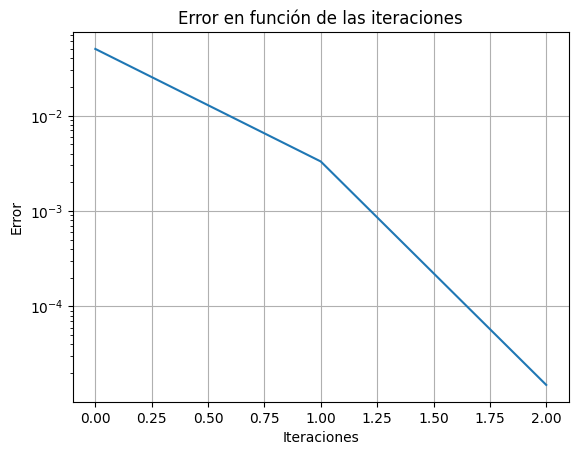

Informe PDF generado: newton_raphson_report.pdf


In [9]:
# Método de Newton-Raphson - Implementación interactiva
# Archivo: newton_raphson_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, diff, lambdify

def newton_raphson_method(f, df, x0, tol, max_iter):
    """
    Realiza el método de Newton-Raphson para encontrar la raíz de una función f.

    Parámetros:
    f : function - La función de la cual se desea encontrar la raíz.
    df : function - La derivada de la función f.
    x0 : float - Valor inicial. Se espera un número real.
    tol : float - Tolerancia para el criterio de parada. Se espera un número pequeño positivo, como 1e-6.
    max_iter : int - Número máximo de iteraciones permitidas. Se espera un entero.

    Retorna:
    raiz : float - La raíz aproximada encontrada.
    history : list - Lista con el historial de iteraciones (almacena iteración, x0, f(x0), df(x0), error).

    Ejemplo:
    f = lambda x: x**2 - 4
    df = lambda x: 2*x
    x0 = 3.0
    tol = 1e-6
    max_iter = 50
    """
    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    error = np.inf
    raiz = x0

    while error > tol and iter_count < max_iter:
        fx = f(raiz)
        dfx = df(raiz)

        if dfx == 0:
            raise ValueError("Derivada nula. No se puede continuar con el método de Newton-Raphson.")

        nuevo_x = raiz - fx / dfx
        error = abs(nuevo_x - raiz)
        history.append([iter_count, raiz, fx, dfx, error])

        raiz = nuevo_x
        iter_count += 1

    return raiz, history

def plot_function(f, x_min, x_max):
    """
    Grafica la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función a graficar.
    x_min : float - Extremo inferior del intervalo.
    x_max : float - Extremo superior del intervalo.
    """
    x = np.linspace(x_min, x_max, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).
    """
    errors = [row[4] for row in history]  # El error está en la columna 4
    iterations = [row[0] for row in history]

    plt.figure()
    plt.plot(iterations, errors, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.show()

def generate_pdf_report(f, df, history, raiz):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método.

    Parámetros:
    f : function - La función evaluada.
    df : function - La derivada de la función evaluada.
    history : list - Historial de las iteraciones.
    raiz : float - La raíz aproximada encontrada.

    Retorno:
    Genera un archivo PDF "newton_raphson_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Newton-Raphson", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Raíz encontrada: {raiz:.6f}", ln=True)

    # Tabla de datos
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    for row in history:
        iteracion, xi, fxi, dfxi, err = row
        pdf.cell(200, 10, txt=f"Iter {iteracion}: x={xi:.6f}, f(x)={fxi:.4e}, df(x)={dfxi:.4e}, error={err:.4e}", ln=True)

    # Guardar archivo
    pdf.output("newton_raphson_report.pdf")
    print("Informe PDF generado: newton_raphson_report.pdf")

def ingresar_datos():
    """
    Función para ingresar los datos de la función y los parámetros del método de Newton-Raphson.
    """
    print("Ingrese la función. Ejemplo: para f(x) = x^3 - 6x^2 + 11x - 6.1, ingrese 'x**3 - 6*x**2 + 11*x - 6.1'")
    func_input = input("Función f(x): ")
    x = symbols('x')  # Declarar la variable simbólica
    f_sym = eval(func_input)  # Crear la expresión simbólica
    f = lambdify(x, f_sym)  # Convertir la expresión a función evaluable

    # Calcular la derivada simbólica
    df_sym = diff(f_sym, x)
    df = lambdify(x, df_sym)

    x0 = float(input("Ingrese el valor inicial x0. Ejemplo: 3.0: "))
    tol = float(input("Ingrese la tolerancia. Ejemplo: 1e-6: "))
    max_iter = int(input("Ingrese el número máximo de iteraciones. Ejemplo: 50: "))

    return f, df, x0, tol, max_iter

def main():
    """
    Función principal que ejecuta el método de Newton-Raphson interactivo.
    """
    # Ingresar los parámetros interactivos
    f, df, x0, tol, max_iter = ingresar_datos()

    # Graficar la función para verificar visualmente
    plot_function(f, x0-5, x0+5)  # Ampliar el intervalo alrededor de x0 para visualizar la función

    try:
        # Ejecutar el método
        raiz, history = newton_raphson_method(f, df, x0, tol, max_iter)

        # Mostrar resultados
        print(f"Raíz aproximada: {raiz}")

        # Graficar la función con la raíz encontrada
        plot_function(f, x0-5, x0+5)
        plot_error(history)

        # Generar PDF
        generate_pdf_report(f, df, history, raiz)

    except ValueError as ve:
        print(ve)

if __name__ == "__main__":
    main()


Ingrese la función. Ejemplo: para f(x) = x^3 - 6x^2 + 11x - 6.1, ingrese 'x**3 - 6*x**2 + 11*x - 6.1'
Función f(x): x**3 - 6*x**2 + 11*x - 6.1
Ingrese el valor inicial x0. Ejemplo: 3.0: 1
Ingrese la tolerancia. Ejemplo: 1e-6: 12
Ingrese el número máximo de iteraciones. Ejemplo: 50: 50


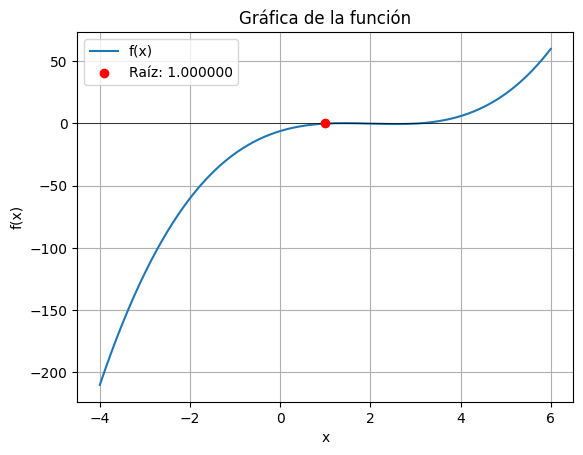

Raíz aproximada: 1.0499999999999998


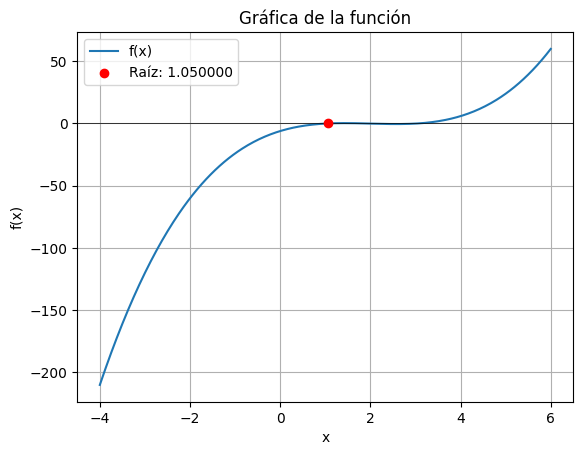

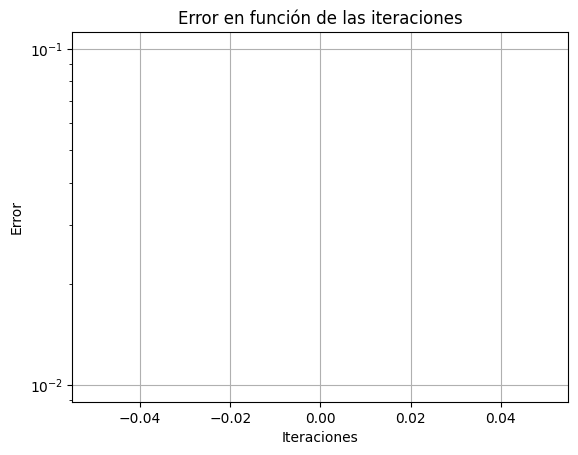

Informe PDF generado: newton_raphson_report.pdf


In [10]:
# Método de Newton-Raphson - Implementación con tabla y gráficos
# Archivo: newton_raphson_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, diff, lambdify
import os

def newton_raphson_method(f, df, x0, tol, max_iter):
    """
    Realiza el método de Newton-Raphson para encontrar la raíz de una función f.

    Parámetros:
    f : function - La función de la cual se desea encontrar la raíz.
    df : function - La derivada de la función f.
    x0 : float - Valor inicial. Se espera un número real.
    tol : float - Tolerancia para el criterio de parada. Se espera un número pequeño positivo, como 1e-6.
    max_iter : int - Número máximo de iteraciones permitidas. Se espera un entero.

    Retorna:
    raiz : float - La raíz aproximada encontrada.
    history : list - Lista con el historial de iteraciones (almacena iteración, x0, f(x0), df(x0), error).
    """
    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    error = np.inf
    raiz = x0

    while error > tol and iter_count < max_iter:
        fx = f(raiz)
        dfx = df(raiz)

        if dfx == 0:
            raise ValueError("Derivada nula. No se puede continuar con el método de Newton-Raphson.")

        nuevo_x = raiz - fx / dfx
        error = abs(nuevo_x - raiz)
        history.append([iter_count, raiz, fx, dfx, error])

        raiz = nuevo_x
        iter_count += 1

    return raiz, history

def plot_function(f, x_min, x_max, raiz):
    """
    Grafica la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función a graficar.
    x_min : float - Extremo inferior del intervalo.
    x_max : float - Extremo superior del intervalo.
    raiz : float - La raíz aproximada encontrada.

    Retorno:
    Guarda el gráfico como 'function_plot.png'.
    """
    x = np.linspace(x_min, x_max, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([raiz], [0], color='red', zorder=5, label=f"Raíz: {raiz:.6f}")
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("function_plot.png")
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).

    Retorno:
    Guarda el gráfico como 'error_plot.png'.
    """
    errors = [row[4] for row in history]  # El error está en la columna 4
    iterations = [row[0] for row in history]

    plt.figure()
    plt.plot(iterations, errors, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.savefig("error_plot.png")
    plt.show()

def generate_pdf_report(f, df, history, raiz):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método.

    Parámetros:
    f : function - La función evaluada.
    df : function - La derivada de la función evaluada.
    history : list - Historial de las iteraciones.
    raiz : float - La raíz aproximada encontrada.

    Retorno:
    Genera un archivo PDF "newton_raphson_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Newton-Raphson", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Raíz encontrada: {raiz:.6f}", ln=True)
    pdf.ln(10)

    # Tabla de datos
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(20, 10, txt="Iter", border=1)
    pdf.cell(40, 10, txt="x_i", border=1)
    pdf.cell(40, 10, txt="f(x_i)", border=1)
    pdf.cell(40, 10, txt="df(x_i)", border=1)
    pdf.cell(40, 10, txt="Error", border=1)
    pdf.ln(10)

    for row in history:
        iteracion, xi, fxi, dfxi, err = row
        pdf.cell(20, 10, txt=f"{iteracion}", border=1)
        pdf.cell(40, 10, txt=f"{xi:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{fxi:.4e}", border=1)
        pdf.cell(40, 10, txt=f"{dfxi:.4e}", border=1)
        pdf.cell(40, 10, txt=f"{err:.4e}", border=1)
        pdf.ln(10)

    # Insertar gráficos
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfico de la función:", ln=True)
    pdf.image("function_plot.png", x=10, y=None, w=180)

    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfico del error:", ln=True)
    pdf.image("error_plot.png", x=10, y=None, w=180)

    # Guardar archivo
    pdf.output("newton_raphson_report.pdf")
    print("Informe PDF generado: newton_raphson_report.pdf")

    # Limpiar imágenes generadas
    if os.path.exists("function_plot.png"):
        os.remove("function_plot.png")
    if os.path.exists("error_plot.png"):
        os.remove("error_plot.png")

def ingresar_datos():
    """
    Función para ingresar los datos de la función y los parámetros del método de Newton-Raphson.
    """
    print("Ingrese la función. Ejemplo: para f(x) = x^3 - 6x^2 + 11x - 6.1, ingrese 'x**3 - 6*x**2 + 11*x - 6.1'")
    func_input = input("Función f(x): ")
    x = symbols('x')  # Declarar la variable simbólica
    f_sym = eval(func_input)  # Crear la expresión simbólica
    f = lambdify(x, f_sym)  # Convertir la expresión a función evaluable

    # Calcular la derivada simbólica
    df_sym = diff(f_sym, x)
    df = lambdify(x, df_sym)

    x0 = float(input("Ingrese el valor inicial x0. Ejemplo: 3.0: "))
    tol = float(input("Ingrese la tolerancia. Ejemplo: 1e-6: "))
    max_iter = int(input("Ingrese el número máximo de iteraciones. Ejemplo: 50: "))

    return f, df, x0, tol, max_iter

def main():
    """
    Función principal que ejecuta el método de Newton-Raphson interactivo.
    """
    # Ingresar los parámetros interactivos
    f, df, x0, tol, max_iter = ingresar_datos()

    # Graficar la función para verificar visualmente
    plot_function(f, x0-5, x0+5, x0)  # Ampliar el intervalo alrededor de x0 para visualizar la función

    try:
        # Ejecutar el método
        raiz, history = newton_raphson_method(f, df, x0, tol, max_iter)

        # Mostrar resultados
        print(f"Raíz aproximada: {raiz}")

        # Graficar la función con la raíz encontrada
        plot_function(f, x0-5, x0+5, raiz)
        plot_error(history)

        # Generar PDF con los resultados
        generate_pdf_report(f, df, history, raiz)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


mejarado

Ingrese la función. Ejemplo: para f(x) = x^3 - 6x^2 + 11x - 6.1, ingrese 'x**3 - 6*x**2 + 11*x - 6.1'
f(x) = x**3 - 6*x**2 + 11*x - 6.1
Ingrese el valor inicial x0: -10
Ingrese la tolerancia (Ej: 1e-6): 12
Ingrese el número máximo de iteraciones: 25
Ingrese el límite inferior del intervalo para la tabla y gráfico: -14
Ingrese el límite superior del intervalo para la tabla y gráfico: 15


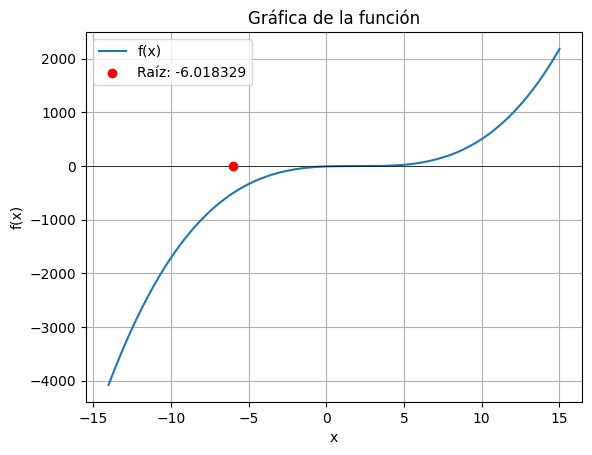

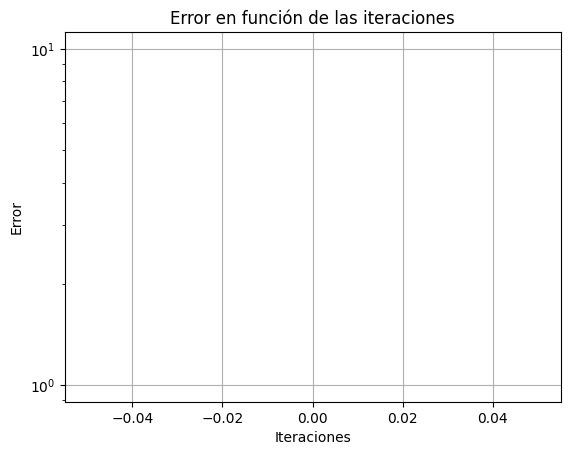

Informe PDF generado: newton_raphson_report.pdf


In [12]:
# Método de Newton-Raphson con tabla de valores de la función
# Archivo: newton_raphson_method_with_table.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, diff, lambdify
import os

def newton_raphson_method(f, df, x0, tol, max_iter):
    """
    Realiza el método de Newton-Raphson para encontrar la raíz de una función f.

    Parámetros:
    f : function - La función de la cual se desea encontrar la raíz.
    df : function - La derivada de la función f.
    x0 : float - Valor inicial. Se espera un número real.
    tol : float - Tolerancia para el criterio de parada. Se espera un número pequeño positivo, como 1e-6.
    max_iter : int - Número máximo de iteraciones permitidas. Se espera un entero.

    Retorna:
    raiz : float - La raíz aproximada encontrada.
    history : list - Lista con el historial de iteraciones (almacena iteración, x0, f(x0), df(x0), error).
    """
    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    error = np.inf
    raiz = x0

    while error > tol and iter_count < max_iter:
        fx = f(raiz)
        dfx = df(raiz)

        if dfx == 0:
            raise ValueError("Derivada nula. No se puede continuar con el método de Newton-Raphson.")

        nuevo_x = raiz - fx / dfx
        error = abs(nuevo_x - raiz)
        history.append([iter_count, raiz, fx, dfx, error])

        raiz = nuevo_x
        iter_count += 1

    return raiz, history

def generate_function_table(f, x_min, x_max, num_points=10):
    """
    Genera una tabla de valores de la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función que se desea evaluar.
    x_min : float - Límite inferior del intervalo.
    x_max : float - Límite superior del intervalo.
    num_points : int - Número de puntos que se usarán para evaluar la función. Valor predeterminado: 10.

    Retorna:
    table : list - Lista de tuplas (x, f(x)) que contiene los valores de x y su respectiva evaluación.
    """
    x_values = np.linspace(x_min, x_max, num_points)
    table = [(x, f(x)) for x in x_values]
    return table

def plot_function(f, x_min, x_max, raiz):
    """
    Grafica la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función a graficar.
    x_min : float - Extremo inferior del intervalo.
    x_max : float - Extremo superior del intervalo.
    raiz : float - La raíz aproximada encontrada.

    Retorno:
    Guarda el gráfico como 'function_plot.png'.
    """
    x = np.linspace(x_min, x_max, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([raiz], [0], color='red', zorder=5, label=f"Raíz: {raiz:.6f}")
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("function_plot.png")
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).

    Retorno:
    Guarda el gráfico como 'error_plot.png'.
    """
    errors = [row[4] for row in history]  # El error está en la columna 4
    iterations = [row[0] for row in history]

    plt.figure()
    plt.plot(iterations, errors, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.savefig("error_plot.png")
    plt.show()

def generate_pdf_report(f, df, history, raiz, table_values):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método.

    Parámetros:
    f : function - La función evaluada.
    df : function - La derivada de la función evaluada.
    history : list - Historial de las iteraciones.
    raiz : float - La raíz aproximada encontrada.
    table_values : list - Lista de valores (x, f(x)) en el intervalo dado.

    Retorno:
    Genera un archivo PDF "newton_raphson_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Newton-Raphson", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Raíz encontrada: {raiz:.6f}", ln=True)
    pdf.ln(10)

    # Tabla de datos del método de Newton-Raphson
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(20, 10, txt="Iter", border=1)
    pdf.cell(40, 10, txt="x_i", border=1)
    pdf.cell(40, 10, txt="f(x_i)", border=1)
    pdf.cell(40, 10, txt="df(x_i)", border=1)
    pdf.cell(40, 10, txt="Error", border=1)
    pdf.ln(10)

    for row in history:
        iteracion, xi, fxi, dfxi, err = row
        pdf.cell(20, 10, txt=f"{iteracion}", border=1)
        pdf.cell(40, 10, txt=f"{xi:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{fxi:.4e}", border=1)
        pdf.cell(40, 10, txt=f"{dfxi:.4e}", border=1)
        pdf.cell(40, 10, txt=f"{err:.4e}", border=1)
        pdf.ln(10)

    # Tabla de valores de la función en el intervalo
    pdf.ln(10)
    pdf.cell(200, 10, txt="Tabla de valores de la función en el intervalo:", ln=True)
    pdf.set_font("Arial", size=10)
    pdf.cell(50, 10, txt="x", border=1)
    pdf.cell(50, 10, txt="f(x)", border=1)
    pdf.ln(10)

    for x, fx in table_values:
        pdf.cell(50, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(50, 10, txt=f"{fx:.6e}", border=1)
        pdf.ln(10)

    # Insertar gráficos
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfico de la función:", ln=True)
    pdf.image("function_plot.png", x=10, y=None, w=180)

    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfico del error:", ln=True)
    pdf.image("error_plot.png", x=10, y=None, w=180)

    # Guardar archivo
    pdf.output("newton_raphson_report.pdf")
    print("Informe PDF generado: newton_raphson_report.pdf")

    # Limpiar imágenes generadas
    if os.path.exists("function_plot.png"):
        os.remove("function_plot.png")
    if os.path.exists("error_plot.png"):
        os.remove("error_plot.png")

def ingresar_datos():
    """
    Función para ingresar los datos de la función y los parámetros del método de Newton-Raphson.
    """
    print("Ingrese la función. Ejemplo: para f(x) = x^3 - 6x^2 + 11x - 6.1, ingrese 'x**3 - 6*x**2 + 11*x - 6.1'")
    func_input = input("f(x) = ")

    x = symbols('x')
    f_expr = eval(func_input)
    f = lambdify(x, f_expr)  # Convierte la expresión simbólica en función numérica
    df_expr = diff(f_expr, x)
    df = lambdify(x, df_expr)

    x0 = float(input("Ingrese el valor inicial x0: "))
    tol = float(input("Ingrese la tolerancia (Ej: 1e-6): "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))
    x_min = float(input("Ingrese el límite inferior del intervalo para la tabla y gráfico: "))
    x_max = float(input("Ingrese el límite superior del intervalo para la tabla y gráfico: "))

    return f, df, x0, tol, max_iter, x_min, x_max

def main():
    try:
        # Ingresar datos
        f, df, x0, tol, max_iter, x_min, x_max = ingresar_datos()

        # Ejecutar Newton-Raphson
        raiz, history = newton_raphson_method(f, df, x0, tol, max_iter)

        # Generar tabla de valores de la función en el intervalo [x_min, x_max]
        table_values = generate_function_table(f, x_min, x_max)

        # Generar gráficos
        plot_function(f, x_min, x_max, raiz)
        plot_error(history)

        # Generar PDF con los resultados
        generate_pdf_report(f, df, history, raiz, table_values)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


**Raiz dorada**

f(x) = x**6 - 9*x
Ingrese el límite inferior del intervalo a: -15
Ingrese el límite superior del intervalo b: 5
Ingrese la tolerancia (Ej: 1e-6): 9
Ingrese el número máximo de iteraciones: 50
Ingrese el límite inferior del intervalo para la tabla y gráfico: -100
Ingrese el límite superior del intervalo para la tabla y gráfico: 100


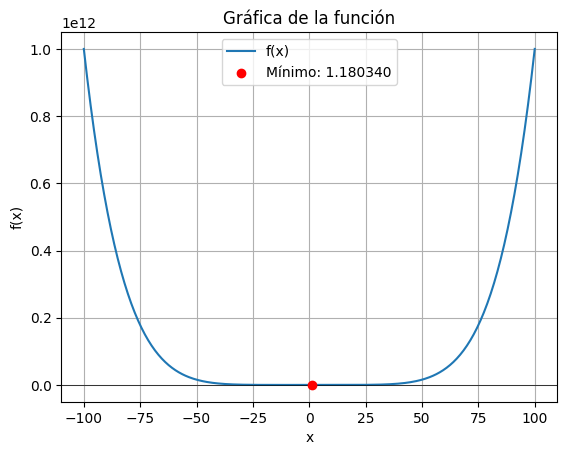

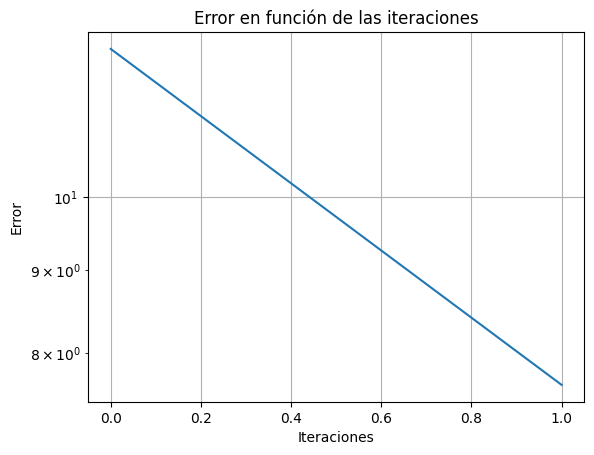

In [14]:
# Método de la Raíz Dorada
# Archivo: golden_section_search_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, lambdify
import os

def golden_section_search(f, a, b, tol, max_iter):
    """
    Realiza el método de búsqueda de sección dorada para encontrar el mínimo de una función f.

    Parámetros:
    f : function - La función de la cual se desea encontrar el mínimo.
    a : float - Límite inferior del intervalo de búsqueda.
    b : float - Límite superior del intervalo de búsqueda.
    tol : float - Tolerancia para el criterio de parada. Se espera un número pequeño positivo, como 1e-6.
    max_iter : int - Número máximo de iteraciones permitidas. Se espera un entero.

    Retorna:
    minimo : float - El mínimo aproximado encontrado.
    history : list - Lista con el historial de iteraciones (almacena iteración, a, b, x1, x2, f(x1), f(x2), intervalo, error).
    """
    phi = (1 + np.sqrt(5)) / 2  # Razón áurea
    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    error = np.inf

    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    f_x1 = f(x1)
    f_x2 = f(x2)

    while (b - a) > tol and iter_count < max_iter:
        if f_x1 < f_x2:
            b = x2
            x2 = x1
            f_x2 = f_x1
            x1 = b - (b - a) / phi
            f_x1 = f(x1)
        else:
            a = x1
            x1 = x2
            f_x1 = f_x2
            x2 = a + (b - a) / phi
            f_x2 = f(x2)

        intervalo = b - a
        error = intervalo
        history.append([iter_count, a, b, x1, x2, f_x1, f_x2, intervalo, error])

        iter_count += 1

    minimo = (a + b) / 2
    return minimo, history

def generate_function_table(f, x_min, x_max, num_points=10):
    """
    Genera una tabla de valores de la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función que se desea evaluar.
    x_min : float - Límite inferior del intervalo.
    x_max : float - Límite superior del intervalo.
    num_points : int - Número de puntos que se usarán para evaluar la función. Valor predeterminado: 10.

    Retorna:
    table : list - Lista de tuplas (x, f(x)) que contiene los valores de x y su respectiva evaluación.
    """
    x_values = np.linspace(x_min, x_max, num_points)
    table = [(x, f(x)) for x in x_values]
    return table

def plot_function(f, x_min, x_max, minimo):
    """
    Grafica la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función a graficar.
    x_min : float - Extremo inferior del intervalo.
    x_max : float - Extremo superior del intervalo.
    minimo : float - El mínimo aproximado encontrado.

    Retorno:
    Guarda el gráfico como 'function_plot.png'.
    """
    x = np.linspace(x_min, x_max, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([minimo], [f(minimo)], color='red', zorder=5, label=f"Mínimo: {minimo:.6f}")
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("function_plot.png")
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).

    Retorno:
    Guarda el gráfico como 'error_plot.png'.
    """
    errores = [row[8] for row in history]  # El error está en la columna 8
    iteraciones = [row[0] for row in history]

    plt.figure()
    plt.plot(iteraciones, errores, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.savefig("error_plot.png")
    plt.show()

def generate_pdf_report(f, history, minimo, table_values):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método.

    Parámetros:
    f : function - La función evaluada.
    history : list - Historial de las iteraciones.
    minimo : float - El mínimo aproximado encontrado.
    table_values : list - Lista de valores (x, f(x)) en el intervalo dado.

    Retorno:
    Genera un archivo PDF "golden_section_search_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de la Raíz Dorada", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Mínimo encontrado: {minimo:.6f}", ln=True)
    pdf.ln(10)

    # Tabla de datos del método de la Raíz Dorada
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(20, 10, txt="Iter", border=1)
    pdf.cell(30, 10, txt="a", border=1)
    pdf.cell(30, 10, txt="b", border=1)
    pdf.cell(30, 10, txt="x1", border=1)
    pdf.cell(30, 10, txt="x2", border=1)
    pdf.cell(30, 10, txt="f(x1)", border=1)
    pdf.cell(30, 10, txt="f(x2)", border=1)
    pdf.cell(30, 10, txt="Intervalo", border=1)
    pdf.cell(30, 10, txt="Error", border=1)
    pdf.ln(10)

    for row in history:
        iteracion, a, b, x1, x2, fx1, fx2, intervalo, err = row
        pdf.cell(20, 10, txt=f"{iteracion}", border=1)
        pdf.cell(30, 10, txt=f"{a:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{b:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{x1:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{x2:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{fx1:.6e}", border=1)
        pdf.cell(30, 10, txt=f"{fx2:.6e}", border=1)
        pdf.cell(30, 10, txt=f"{intervalo:.6e}", border=1)
        pdf.cell(30, 10, txt=f"{err:.6e}", border=1)
        pdf.ln(10)

    # Tabla de valores de la función en el intervalo
    pdf.ln(10)
    pdf.cell(200, 10, txt="Tabla de valores de la función en el intervalo:", ln=True)
    pdf.set_font("Arial", size=10)
    pdf.cell(50, 10, txt="x", border=1)
    pdf.cell(50, 10, txt="f(x)", border=1)
    pdf.ln(10)

    for x, fx in table_values:
        pdf.cell(50, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(50, 10, txt=f"{fx:.6e}", border=1)
        pdf.ln(10)

    # Insertar gráficos
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfico de la función:", ln=True)
    pdf.image("function_plot.png", x=10, y=pdf.get_y(), w=190)
    pdf.ln(100)
    pdf.cell(200, 10, txt="Gráfico del error:", ln=True)
    pdf.image("error_plot.png", x=10, y=pdf.get_y(), w=190)

    pdf.output("golden_section_search_report.pdf")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de la raíz dorada.

    Retorno:
    f : function - Función ingresada por el usuario.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones.
    x_min : float - Límite inferior del intervalo para la tabla y gráfico.
    x_max : float - Límite superior del intervalo para la tabla y gráfico.
    """
    func_input = input("f(x) = ")

    x = symbols('x')
    f_expr = eval(func_input)
    f = lambdify(x, f_expr)  # Convierte la expresión simbólica en función numérica

    a = float(input("Ingrese el límite inferior del intervalo a: "))
    b = float(input("Ingrese el límite superior del intervalo b: "))
    tol = float(input("Ingrese la tolerancia (Ej: 1e-6): "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))
    x_min = float(input("Ingrese el límite inferior del intervalo para la tabla y gráfico: "))
    x_max = float(input("Ingrese el límite superior del intervalo para la tabla y gráfico: "))

    return f, a, b, tol, max_iter, x_min, x_max

def main():
    try:
        # Ingresar datos
        f, a, b, tol, max_iter, x_min, x_max = ingresar_datos()

        # Ejecutar Búsqueda de Sección Dorada
        minimo, history = golden_section_search(f, a, b, tol, max_iter)

        # Generar tabla de valores de la función en el intervalo [x_min, x_max]
        table_values = generate_function_table(f, x_min, x_max)

        # Generar gráficos
        plot_function(f, x_min, x_max, minimo)
        plot_error(history)

        # Generar PDF con los resultados
        generate_pdf_report(f, history, minimo, table_values)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


In [15]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from fpdf import FPDF  # Asegúrate de tener fpdf instalado: pip install fpdf

# Definición de clases y métodos (mantén el código de los métodos sin cambios previos)

class PDFGenerator(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Resultados del Método Numérico', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Página {self.page_no()}', 0, 0, 'C')

    def add_results_table(self, metodo, data):
        self.set_font('Arial', '', 10)
        self.cell(0, 10, f'Resultados para el método: {metodo}', 0, 1, 'C')
        col_widths = [10, 40, 40, 40, 40, 40]  # Ajusta los anchos de las columnas según necesites
        headers = ['Iter', 'Valores', 'Función', 'Derivadas', 'Error', 'Tolerancia']
        for col_width, header in zip(col_widths, headers):
            self.cell(col_width, 10, header, 1)
        self.ln()

        for row in data:
            for col_width, item in zip(col_widths, row):
                self.cell(col_width, 10, str(item), 1)
            self.ln()

def guardar_pdf(metodo, data):
    """
    Genera un PDF con los resultados del método numérico.
    """
    pdf = PDFGenerator()
    pdf.add_page()
    pdf.add_results_table(metodo, data)
    nombre_archivo = f'resultados_{metodo}.pdf'
    pdf.output(nombre_archivo)
    print(f"PDF guardado como: {nombre_archivo}")

def ejecutar_biseccion():
    func, expr = solicitar_funcion()
    a = solicitar_float("Introduce el límite inferior a", "-10")
    b = solicitar_float("Introduce el límite superior b", "10")
    tol = solicitar_float("Introduce la tolerancia", "0.001")
    metodo = Biseccion(func, a, b, tol)
    raiz, data = metodo.encontrar_raiz()  # Modificación del método para devolver datos de la tabla
    print(f"Raíz aproximada (Bisección): {raiz}")

    # Genera y guarda el PDF con los resultados
    guardar_pdf("Biseccion", data)

# Ejemplo de implementación ajustada para un método (Bisección).
class Biseccion:
    def __init__(self, func, a, b, tol):
        self.func = func
        self.a = a
        self.b = b
        self.tol = tol
        self.iterations = []

    def encontrar_raiz(self):
        a, b = self.a, self.b
        f = self.func
        tol = self.tol
        iter_count = 0

        while abs(b - a) > tol:
            c = (a + b) / 2
            f_a = f(a)
            f_c = f(c)
            error = abs(b - a)

            # Añadir datos a la tabla de resultados
            self.iterations.append([iter_count, [a, b], f_c, '-', error, tol])

            if f_c == 0 or error < tol:
                break
            elif f_a * f_c < 0:
                b = c
            else:
                a = c

            iter_count += 1

        # Añadimos la última iteración con los valores finales
        self.iterations.append([iter_count, [a, b], f(c), '-', abs(b - a), tol])
        return c, self.iterations

# Resto del código de los otros métodos ajustados de manera similar

if __name__ == "__main__":
    menu()


Bienvenido al programa de métodos numéricos.

Selecciona un método:
1. Bisección
2. Newton-Raphson
3. Punto Fijo
4. Falsa Posición
5. Interpolación Cuadrática
6. Newton Generalizado
0. Salir


KeyboardInterrupt: Interrupted by user

**Bisección**


In [19]:
# Método de Bisección
# Archivo: bisection_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, lambdify
import os

def bisection_method(f, a, b, tol, max_iter):
    """
    Realiza el método de bisección para encontrar la raíz de una función f en el intervalo [a, b].

    Parámetros:
    f : function - La función para encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    raiz : float - La raíz aproximada encontrada.
    history : list - Lista con el historial de iteraciones.
    """
    if f(a) * f(b) > 0:
        raise ValueError("El intervalo no contiene una raíz")

    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    error = np.inf

    while (b - a) > tol and iter_count < max_iter:
        c = (a + b) / 2
        f_c = f(c)
        f_a = f(a)
        f_b = f(b)

        if f_c == 0:
            break  # La raíz exacta se ha encontrado
        elif f_a * f_c < 0:
            b = c
        else:
            a = c

        error = abs(b - a)
        history.append([iter_count, a, b, c, f_c, error])

        iter_count += 1

    raiz = (a + b) / 2
    return raiz, history

def generate_function_table(f, x_min, x_max, num_points=10):
    """
    Genera una tabla de valores de la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función que se desea evaluar.
    x_min : float - Límite inferior del intervalo.
    x_max : float - Límite superior del intervalo.
    num_points : int - Número de puntos que se usarán para evaluar la función. Valor predeterminado: 10.

    Retorna:
    table : list - Lista de tuplas (x, f(x)) que contiene los valores de x y su respectiva evaluación.
    """
    x_values = np.linspace(x_min, x_max, num_points)
    table = [(x, f(x)) for x in x_values]
    return table

def plot_function(f, x_min, x_max, raiz):
    """
    Grafica la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función a graficar.
    x_min : float - Extremo inferior del intervalo.
    x_max : float - Extremo superior del intervalo.
    raiz : float - La raíz aproximada encontrada.

    Retorno:
    Guarda el gráfico como 'function_plot.png'.
    """
    x = np.linspace(x_min, x_max, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([raiz], [f(raiz)], color='red', zorder=5, label=f"Raíz: {raiz:.6f}")
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("function_plot.png")
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).

    Retorno:
    Guarda el gráfico como 'error_plot.png'.
    """
    errores = [row[5] for row in history]  # El error está en la columna 5
    iteraciones = [row[0] for row in history]

    plt.figure()
    plt.plot(iteraciones, errores, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.savefig("error_plot.png")
    plt.show()

def generate_pdf_report(f, history, raiz, table_values, func_expr):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método de bisección.

    Parámetros:
    f : function - La función evaluada.
    history : list - Historial de las iteraciones.
    raiz : float - La raíz aproximada encontrada.
    table_values : list - Lista de valores (x, f(x)) en el intervalo dado.
    func_expr : str - Expresión simbólica de la función para incluir en el informe.

    Retorno:
    Genera un archivo PDF "bisection_method_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Bisección", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Función utilizada: {func_expr}", ln=True)
    pdf.cell(200, 10, txt=f"Raíz encontrada: {raiz:.6f}", ln=True)
    pdf.ln(10)

    # Tabla de datos del método de Bisección
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(20, 10, txt="Iter", border=1)
    pdf.cell(30, 10, txt="a", border=1)
    pdf.cell(30, 10, txt="b", border=1)
    pdf.cell(30, 10, txt="c", border=1)
    pdf.cell(30, 10, txt="f(c)", border=1)
    pdf.cell(30, 10, txt="Error", border=1)
    pdf.ln(10)

    for row in history:
        iteracion, a, b, c, fc, err = row
        pdf.cell(20, 10, txt=f"{iteracion}", border=1)
        pdf.cell(30, 10, txt=f"{a:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{b:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{c:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{fc:.6e}", border=1)
        pdf.cell(30, 10, txt=f"{err:.6e}", border=1)
        pdf.ln(10)

    # Tabla de valores de la función en el intervalo
    pdf.ln(10)
    pdf.cell(200, 10, txt="Tabla de valores de la función en el intervalo:", ln=True)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iter", border=1)
    pdf.cell(50, 10, txt="x", border=1)
    pdf.cell(50, 10, txt="f(x)", border=1)
    pdf.cell(50, 10, txt="Error", border=1)
    pdf.cell(50, 10, txt="Tolerancia", border=1)
    pdf.ln(10)

    for i, (x, fx) in enumerate(table_values):
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(50, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(50, 10, txt=f"{fx:.6e}", border=1)
        pdf.cell(50, 10, txt="N/A", border=1)  # Error no disponible para esta tabla
        pdf.cell(50, 10, txt="N/A", border=1)  # Tolerancia no disponible para esta tabla
        pdf.ln(10)

    # Gráficos
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfico de la función:", ln=True)
    pdf.image("function_plot.png", x=10, y=pdf.get_y(), w=190)
    pdf.ln(100)
    pdf.cell(200, 10, txt="Gráfico del error:", ln=True)
    pdf.image("error_plot.png", x=10, y=pdf.get_y(), w=190)

    pdf.output("bisection_method_report.pdf")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de bisección.

    Retorno:
    f : function - Función ingresada por el usuario.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones.
    x_min : float - Límite inferior del intervalo para la tabla y gráfico.
    x_max : float - Límite superior del intervalo para la tabla y gráfico.
    """
    func_input = input("f(x) = ")

    x = symbols('x')
    f_expr = eval(func_input)
    f = lambdify(x, f_expr)  # Convierte la expresión simbólica en función numérica

    a = float(input("Ingrese el límite inferior del intervalo a: "))
    b = float(input("Ingrese el límite superior del intervalo b: "))
    tol = float(input("Ingrese la tolerancia (Ej: 1e-6): "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))
    x_min = float(input("Ingrese el límite inferior del intervalo para la tabla y gráfico: "))
    x_max = float(input("Ingrese el límite superior del intervalo para la tabla y gráfico: "))

    return f, a, b, tol, max_iter, x_min, x_max, str(f_expr)

def main():
    try:
        # Ingresar datos
        f, a, b, tol, max_iter, x_min, x_max, func_expr = ingresar_datos()

        # Ejecutar Bisección
        raiz, history = bisection_method(f, a, b, tol, max_iter)

        # Generar tabla de valores de la función en el intervalo [x_min, x_max]
        table_values = generate_function_table(f, x_min, x_max)

        # Generar gráficos
        plot_function(f, x_min, x_max, raiz)
        plot_error(history)

        # Generar PDF con los resultados
        generate_pdf_report(f, history, raiz, table_values, func_expr)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


KeyboardInterrupt: Interrupted by user

**Newton Raphson**

In [21]:
# Método de Newton-Raphson
# Archivo: newton_raphson_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, diff, lambdify
import os

def newton_raphson_method(f, df, x0, tol, max_iter):
    """
    Realiza el método de Newton-Raphson para encontrar la raíz de una función f.

    Parámetros:
    f : function - La función para encontrar la raíz.
    df : function - La derivada de la función f.
    x0 : float - Valor inicial para la iteración.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    raiz : float - La raíz aproximada encontrada.
    history : list - Lista con el historial de iteraciones.
    """
    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    x = x0
    error = np.inf

    while error > tol and iter_count < max_iter:
        f_x = f(x)
        df_x = df(x)

        if df_x == 0:
            raise ValueError("La derivada es cero. El método de Newton-Raphson no puede continuar.")

        x_new = x - f_x / df_x
        error = abs(x_new - x)

        history.append([iter_count, x, f_x, df_x, error])

        x = x_new
        iter_count += 1

    raiz = x
    return raiz, history

def generate_function_table(f, x_min, x_max, num_points=10):
    """
    Genera una tabla de valores de la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función que se desea evaluar.
    x_min : float - Límite inferior del intervalo.
    x_max : float - Límite superior del intervalo.
    num_points : int - Número de puntos que se usarán para evaluar la función. Valor predeterminado: 10.

    Retorna:
    table : list - Lista de tuplas (x, f(x)) que contiene los valores de x y su respectiva evaluación.
    """
    x_values = np.linspace(x_min, x_max, num_points)
    table = [(x, f(x)) for x in x_values]
    return table

def plot_function(f, x_min, x_max, raiz):
    """
    Grafica la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función a graficar.
    x_min : float - Extremo inferior del intervalo.
    x_max : float - Extremo superior del intervalo.
    raiz : float - La raíz aproximada encontrada.

    Retorno:
    Guarda el gráfico como 'function_plot_newton_raphson.png'.
    """
    x = np.linspace(x_min, x_max, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([raiz], [f(raiz)], color='red', zorder=5, label=f"Raíz: {raiz:.6f}")
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("function_plot_newton_raphson.png")
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).

    Retorno:
    Guarda el gráfico como 'error_plot_newton_raphson.png'.
    """
    errores = [row[4] for row in history]  # El error está en la columna 4
    iteraciones = [row[0] for row in history]

    plt.figure()
    plt.plot(iteraciones, errores, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.savefig("error_plot_newton_raphson.png")
    plt.show()

def generate_pdf_report(f, df, history, raiz, table_values, func_expr, dfunc_expr):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método de Newton-Raphson.

    Parámetros:
    f : function - La función evaluada.
    df : function - La derivada de la función evaluada.
    history : list - Historial de las iteraciones.
    raiz : float - La raíz aproximada encontrada.
    table_values : list - Lista de valores (x, f(x)) en el intervalo dado.
    func_expr : str - Expresión simbólica de la función para incluir en el informe.
    dfunc_expr : str - Expresión simbólica de la derivada de la función para incluir en el informe.

    Retorno:
    Genera un archivo PDF "newton_raphson_method_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Newton-Raphson", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Función utilizada: {func_expr}", ln=True)
    pdf.cell(200, 10, txt=f"Derivada utilizada: {dfunc_expr}", ln=True)
    pdf.cell(200, 10, txt=f"Raíz encontrada: {raiz:.6f}", ln=True)
    pdf.ln(10)

    # Tabla de datos del método de Newton-Raphson
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(20, 10, txt="Iter", border=1)
    pdf.cell(40, 10, txt="x", border=1)
    pdf.cell(40, 10, txt="f(x)", border=1)
    pdf.cell(40, 10, txt="f'(x)", border=1)
    pdf.cell(40, 10, txt="Error", border=1)
    pdf.ln(10)

    for row in history:
        iteracion, x, fx, dfx, err = row
        pdf.cell(20, 10, txt=f"{iteracion}", border=1)
        pdf.cell(40, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{fx:.6e}", border=1)
        pdf.cell(40, 10, txt=f"{dfx:.6e}", border=1)
        pdf.cell(40, 10, txt=f"{err:.6e}", border=1)
        pdf.ln(10)

    # Tabla de valores de la función en el intervalo
    pdf.ln(10)
    pdf.cell(200, 10, txt="Tabla de valores de la función en el intervalo:", ln=True)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iter", border=1)
    pdf.cell(50, 10, txt="x", border=1)
    pdf.cell(50, 10, txt="f(x)", border=1)
    pdf.cell(50, 10, txt="Error", border=1)
    pdf.cell(50, 10, txt="Tolerancia", border=1)
    pdf.ln(10)

    for i, (x, fx) in enumerate(table_values):
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(50, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(50, 10, txt=f"{fx:.6e}", border=1)
        pdf.cell(50, 10, txt="N/A", border=1)  # Error no disponible para esta tabla
        pdf.cell(50, 10, txt="N/A", border=1)  # Tolerancia no disponible para esta tabla
        pdf.ln(10)

    # Gráficos
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfico de la función:", ln=True)
    pdf.image("function_plot_newton_raphson.png", x=10, y=pdf.get_y(), w=190)
    pdf.ln(100)
    pdf.cell(200, 10, txt="Gráfico del error:", ln=True)
    pdf.image("error_plot_newton_raphson.png", x=10, y=pdf.get_y(), w=190)

    # Guardar el PDF
    pdf_output = "newton_raphson_method_report.pdf"
    pdf.output(pdf_output)
    print(f"PDF generado: {pdf_output}")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de Newton-Raphson.

    Retorno:
    f : function - Función ingresada por el usuario.
    df : function - Derivada de la función ingresada.
    x0 : float - Valor inicial para la iteración.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones.
    x_min : float - Límite inferior del intervalo para la tabla y gráfico.
    x_max : float - Límite superior del intervalo para la tabla y gráfico.
    """
    func_input = input("f(x) = ")
    dfunc_input = input("f'(x) = ")

    x = symbols('x')
    f_expr = eval(func_input)
    df_expr = eval(dfunc_input)

    f = lambdify(x, f_expr)
    df = lambdify(x, df_expr)

    x0 = float(input("Ingrese el valor inicial x0: "))
    tol = float(input("Ingrese la tolerancia (Ej: 1e-6): "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))
    x_min = float(input("Ingrese el límite inferior del intervalo para la tabla y gráfico: "))
    x_max = float(input("Ingrese el límite superior del intervalo para la tabla y gráfico: "))

    return f, df, x0, tol, max_iter, x_min, x_max, str(f_expr), str(df_expr)

def main():
    try:
        # Ingresar datos
        f, df, x0, tol, max_iter, x_min, x_max, func_expr, dfunc_expr = ingresar_datos()

        # Ejecutar Newton-Raphson
        raiz, history = newton_raphson_method(f, df, x0, tol, max_iter)

        # Generar tabla de valores de la función en el intervalo [x_min, x_max]
        table_values = generate_function_table(f, x_min, x_max)

        # Generar gráficos
        plot_function(f, x_min, x_max, raiz)
        plot_error(history)

        # Generar PDF con los resultados
        generate_pdf_report(f, df, history, raiz, table_values, func_expr, dfunc_expr)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


f(x) = 3x**2 -16*x + 34
f'(x) = 6*x -16


SyntaxError: invalid decimal literal (<string>, line 1)

**Método de Newton Raphson con sus derivadas**

f(x) = 12*x**4 - 68
f'(x) = 48*x**3
f''(x) = 144*x**2
Ingrese el valor inicial x0: -15
Ingrese la tolerancia (Ej: 1e-6): 95
Ingrese el número máximo de iteraciones: 50
Ingrese el límite inferior del intervalo para la tabla y gráfico: -100
Ingrese el límite superior del intervalo para la tabla y gráfico: 100


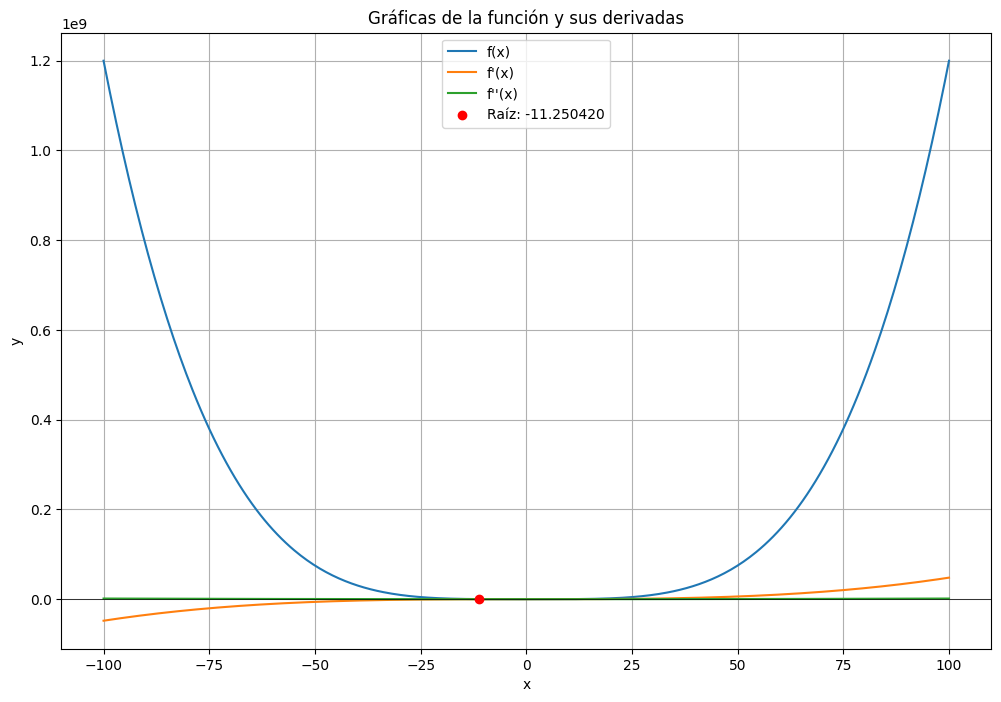

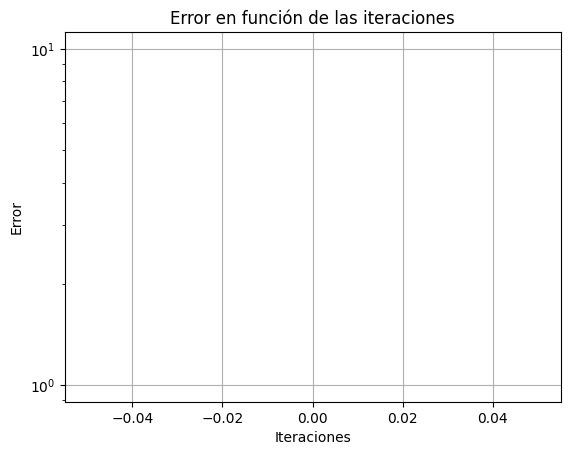

PDF generado: newton_raphson_method_report.pdf


In [22]:
# Método de Newton-Raphson
# Archivo: newton_raphson_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, diff, lambdify, parse_expr
import os

def newton_raphson_method(f, df, x0, tol, max_iter):
    """
    Realiza el método de Newton-Raphson para encontrar la raíz de una función f.

    Parámetros:
    f : function - La función para encontrar la raíz.
    df : function - La derivada de la función f.
    x0 : float - Valor inicial para la iteración.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    raiz : float - La raíz aproximada encontrada.
    history : list - Lista con el historial de iteraciones.
    """
    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    x = x0
    error = np.inf

    while error > tol and iter_count < max_iter:
        f_x = f(x)
        df_x = df(x)

        if df_x == 0:
            raise ValueError("La derivada es cero. El método de Newton-Raphson no puede continuar.")

        x_new = x - f_x / df_x
        error = abs(x_new - x)

        history.append([iter_count, x, f_x, df_x, error])

        x = x_new
        iter_count += 1

    raiz = x
    return raiz, history

def generate_function_table(f, x_min, x_max, num_points=10):
    """
    Genera una tabla de valores de la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función que se desea evaluar.
    x_min : float - Límite inferior del intervalo.
    x_max : float - Límite superior del intervalo.
    num_points : int - Número de puntos que se usarán para evaluar la función. Valor predeterminado: 10.

    Retorna:
    table : list - Lista de tuplas (x, f(x)) que contiene los valores de x y su respectiva evaluación.
    """
    x_values = np.linspace(x_min, x_max, num_points)
    table = [(x, f(x)) for x in x_values]
    return table

def plot_function(f, df, ddf, x_min, x_max, raiz):
    """
    Grafica la función f, su derivada df y su segunda derivada ddf en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función a graficar.
    df : function - La derivada de la función.
    ddf : function - La segunda derivada de la función.
    x_min : float - Extremo inferior del intervalo.
    x_max : float - Extremo superior del intervalo.
    raiz : float - La raíz aproximada encontrada.

    Retorno:
    Guarda el gráfico como 'function_plot_newton_raphson.png'.
    """
    x = np.linspace(x_min, x_max, 400)
    y = f(x)
    dy = df(x)
    ddy = ddf(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label="f(x)")
    plt.plot(x, dy, label="f'(x)")
    plt.plot(x, ddy, label="f''(x)")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([raiz], [f(raiz)], color='red', zorder=5, label=f"Raíz: {raiz:.6f}")
    plt.title("Gráficas de la función y sus derivadas")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.savefig("function_plot_newton_raphson.png")
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).

    Retorno:
    Guarda el gráfico como 'error_plot_newton_raphson.png'.
    """
    errores = [row[4] for row in history]  # El error está en la columna 4
    iteraciones = [row[0] for row in history]

    plt.figure()
    plt.plot(iteraciones, errores, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.savefig("error_plot_newton_raphson.png")
    plt.show()

def generate_pdf_report(f, df, ddf, history, raiz, table_values, func_expr, dfunc_expr, ddfunc_expr):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método de Newton-Raphson.

    Parámetros:
    f : function - La función evaluada.
    df : function - La derivada de la función evaluada.
    ddf : function - La segunda derivada de la función evaluada.
    history : list - Historial de las iteraciones.
    raiz : float - La raíz aproximada encontrada.
    table_values : list - Lista de valores (x, f(x)) en el intervalo dado.
    func_expr : str - Expresión simbólica de la función para incluir en el informe.
    dfunc_expr : str - Expresión simbólica de la derivada de la función para incluir en el informe.
    ddfunc_expr : str - Expresión simbólica de la segunda derivada de la función para incluir en el informe.

    Retorno:
    Genera un archivo PDF "newton_raphson_method_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Newton-Raphson", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Función utilizada: {func_expr}", ln=True)
    pdf.cell(200, 10, txt=f"Primera derivada: {dfunc_expr}", ln=True)
    pdf.cell(200, 10, txt=f"Segunda derivada: {ddfunc_expr}", ln=True)
    pdf.cell(200, 10, txt=f"Raíz encontrada: {raiz:.6f}", ln=True)
    pdf.ln(10)

    # Tabla de datos del método de Newton-Raphson
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(20, 10, txt="Iter", border=1)
    pdf.cell(40, 10, txt="x", border=1)
    pdf.cell(40, 10, txt="f(x)", border=1)
    pdf.cell(40, 10, txt="f'(x)", border=1)
    pdf.cell(40, 10, txt="Error", border=1)
    pdf.ln(10)

    for row in history:
        iteracion, x, fx, dfx, err = row
        pdf.cell(20, 10, txt=f"{iteracion}", border=1)
        pdf.cell(40, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{fx:.6e}", border=1)
        pdf.cell(40, 10, txt=f"{dfx:.6e}", border=1)
        pdf.cell(40, 10, txt=f"{err:.6e}", border=1)
        pdf.ln(10)

    # Tabla de valores de la función en el intervalo
    pdf.ln(10)
    pdf.cell(200, 10, txt="Tabla de valores de la función en el intervalo:", ln=True)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iter", border=1)
    pdf.cell(50, 10, txt="x", border=1)
    pdf.cell(50, 10, txt="f(x)", border=1)
    pdf.cell(50, 10, txt="Error", border=1)
    pdf.cell(50, 10, txt="Tolerancia", border=1)
    pdf.ln(10)

    for i, (x, fx) in enumerate(table_values):
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(50, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(50, 10, txt=f"{fx:.6e}", border=1)
        pdf.cell(50, 10, txt=f"N/A", border=1)  # Error no disponible aquí
        pdf.cell(50, 10, txt=f"N/A", border=1)  # Tolerancia no disponible aquí
        pdf.ln(10)

    # Insertar gráficos
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfica de la función y sus derivadas:", ln=True)
    pdf.ln(5)
    pdf.image("function_plot_newton_raphson.png", x=10, y=pdf.get_y(), w=180)
    pdf.ln(100)
    pdf.cell(200, 10, txt="Gráfica del error:", ln=True)
    pdf.ln(5)
    pdf.image("error_plot_newton_raphson.png", x=10, y=pdf.get_y(), w=180)

    # Guardar el PDF
    pdf_output = "newton_raphson_method_report.pdf"
    pdf.output(pdf_output)
    print(f"PDF generado: {pdf_output}")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de Newton-Raphson.

    Retorno:
    f : function - Función ingresada por el usuario.
    df : function - Derivada de la función ingresada.
    ddf : function - Segunda derivada de la función ingresada.
    x0 : float - Valor inicial para la iteración.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones.
    x_min : float - Límite inferior del intervalo para la tabla y gráfico.
    x_max : float - Límite superior del intervalo para la tabla y gráfico.
    """
    func_input = input("f(x) = ")
    dfunc_input = input("f'(x) = ")
    ddfunc_input = input("f''(x) = ")

    x = symbols('x')
    f_expr = parse_expr(func_input)
    df_expr = parse_expr(dfunc_input)
    ddf_expr = parse_expr(ddfunc_input)

    f = lambdify(x, f_expr)
    df = lambdify(x, df_expr)
    ddf = lambdify(x, ddf_expr)

    x0 = float(input("Ingrese el valor inicial x0: "))
    tol = float(input("Ingrese la tolerancia (Ej: 1e-6): "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))
    x_min = float(input("Ingrese el límite inferior del intervalo para la tabla y gráfico: "))
    x_max = float(input("Ingrese el límite superior del intervalo para la tabla y gráfico: "))

    return f, df, ddf, x0, tol, max_iter, x_min, x_max, str(f_expr), str(df_expr), str(ddf_expr)

def main():
    try:
        # Ingresar datos
        f, df, ddf, x0, tol, max_iter, x_min, x_max, func_expr, dfunc_expr, ddfunc_expr = ingresar_datos()

        # Ejecutar Newton-Raphson
        raiz, history = newton_raphson_method(f, df, x0, tol, max_iter)

        # Generar tabla de valores de la función en el intervalo [x_min, x_max]
        table_values = generate_function_table(f, x_min, x_max)

        # Generar gráficos
        plot_function(f, df, ddf, x_min, x_max, raiz)
        plot_error(history)

        # Generar PDF con los resultados
        generate_pdf_report(f, df, ddf, history, raiz, table_values, func_expr, dfunc_expr, ddfunc_expr)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


**Sección Dorada**


f(x) = 3*x**2 -5
Ingrese el límite inferior del intervalo a: -12
Ingrese el límite superior del intervalo b: 21
Ingrese la tolerancia (Ej: 1e-6): 1e-6
Ingrese el número máximo de iteraciones: 50
Ingrese el límite inferior del intervalo para la tabla y gráfico: -20
Ingrese el límite superior del intervalo para la tabla y gráfico: 20


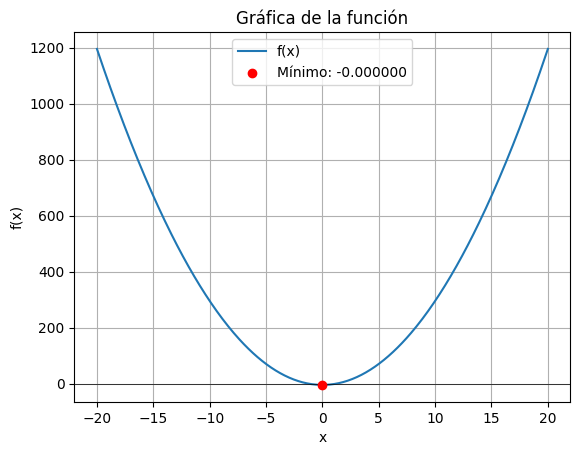

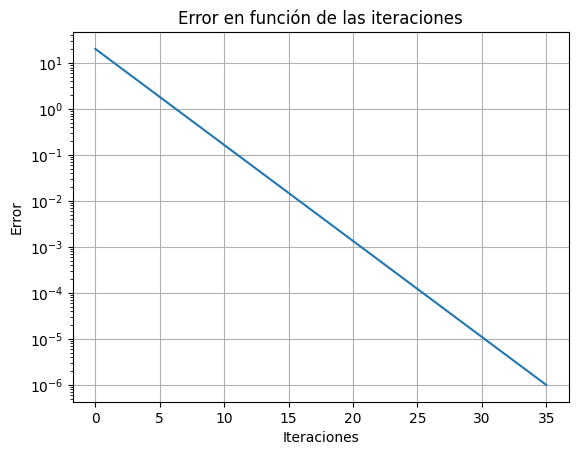

In [16]:
# Método de la Raíz Dorada
# Archivo: golden_section_search_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, lambdify, diff
import os

def golden_section_search(f, a, b, tol, max_iter):
    """
    Realiza el método de búsqueda de sección dorada para encontrar el mínimo de una función f.

    Parámetros:
    f : function - La función de la cual se desea encontrar el mínimo.
    a : float - Límite inferior del intervalo de búsqueda.
    b : float - Límite superior del intervalo de búsqueda.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    minimo : float - El mínimo aproximado encontrado.
    history : list - Lista con el historial de iteraciones.
    """
    phi = (1 + np.sqrt(5)) / 2  # Razón áurea
    history = []  # Para almacenar los datos de cada iteración
    iter_count = 0
    error = np.inf

    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    f_x1 = f(x1)
    f_x2 = f(x2)

    while (b - a) > tol and iter_count < max_iter:
        if f_x1 < f_x2:
            b = x2
            x2 = x1
            f_x2 = f_x1
            x1 = b - (b - a) / phi
            f_x1 = f(x1)
        else:
            a = x1
            x1 = x2
            f_x1 = f_x2
            x2 = a + (b - a) / phi
            f_x2 = f(x2)

        intervalo = b - a
        error = intervalo
        history.append([iter_count, a, b, x1, x2, f_x1, f_x2, intervalo, error])

        iter_count += 1

    minimo = (a + b) / 2
    return minimo, history

def generate_function_table(f, x_min, x_max, num_points=10):
    """
    Genera una tabla de valores de la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función que se desea evaluar.
    x_min : float - Límite inferior del intervalo.
    x_max : float - Límite superior del intervalo.
    num_points : int - Número de puntos que se usarán para evaluar la función. Valor predeterminado: 10.

    Retorna:
    table : list - Lista de tuplas (x, f(x)) que contiene los valores de x y su respectiva evaluación.
    """
    x_values = np.linspace(x_min, x_max, num_points)
    table = [(x, f(x)) for x in x_values]
    return table

def plot_function(f, x_min, x_max, minimo):
    """
    Grafica la función f en el intervalo [x_min, x_max].

    Parámetros:
    f : function - La función a graficar.
    x_min : float - Extremo inferior del intervalo.
    x_max : float - Extremo superior del intervalo.
    minimo : float - El mínimo aproximado encontrado.

    Retorno:
    Guarda el gráfico como 'function_plot.png'.
    """
    x = np.linspace(x_min, x_max, 400)
    y = f(x)

    plt.figure()
    plt.plot(x, y, label="f(x)")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([minimo], [f(minimo)], color='red', zorder=5, label=f"Mínimo: {minimo:.6f}")
    plt.title("Gráfica de la función")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("function_plot.png")
    plt.show()

def plot_error(history):
    """
    Grafica el error en función de las iteraciones.

    Parámetros:
    history : list - Historial de las iteraciones (contiene el error en cada iteración).

    Retorno:
    Guarda el gráfico como 'error_plot.png'.
    """
    errores = [row[8] for row in history]  # El error está en la columna 8
    iteraciones = [row[0] for row in history]

    plt.figure()
    plt.plot(iteraciones, errores, label="Error")
    plt.yscale("log")  # Escala logarítmica para visualizar mejor el error
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error en función de las iteraciones")
    plt.grid(True)
    plt.savefig("error_plot.png")
    plt.show()

def generate_pdf_report(f, history, minimo, table_values, func_expr):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y los resultados del método.

    Parámetros:
    f : function - La función evaluada.
    history : list - Historial de las iteraciones.
    minimo : float - El mínimo aproximado encontrado.
    table_values : list - Lista de valores (x, f(x)) en el intervalo dado.
    func_expr : str - Expresión simbólica de la función para incluir en el informe.

    Retorno:
    Genera un archivo PDF "golden_section_search_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de la Raíz Dorada", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Función utilizada: {func_expr}", ln=True)
    pdf.cell(200, 10, txt=f"Mínimo encontrado: {minimo:.6f}", ln=True)
    pdf.ln(10)

    # Tabla de datos del método de la Raíz Dorada
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Historial de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(20, 10, txt="Iter", border=1)
    pdf.cell(30, 10, txt="a", border=1)
    pdf.cell(30, 10, txt="b", border=1)
    pdf.cell(30, 10, txt="x1", border=1)
    pdf.cell(30, 10, txt="x2", border=1)
    pdf.cell(30, 10, txt="f(x1)", border=1)
    pdf.cell(30, 10, txt="f(x2)", border=1)
    pdf.cell(30, 10, txt="Intervalo", border=1)
    pdf.cell(30, 10, txt="Error", border=1)
    pdf.ln(10)

    for row in history:
        iteracion, a, b, x1, x2, fx1, fx2, intervalo, err = row
        pdf.cell(20, 10, txt=f"{iteracion}", border=1)
        pdf.cell(30, 10, txt=f"{a:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{b:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{x1:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{x2:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{fx1:.6e}", border=1)
        pdf.cell(30, 10, txt=f"{fx2:.6e}", border=1)
        pdf.cell(30, 10, txt=f"{intervalo:.6e}", border=1)
        pdf.cell(30, 10, txt=f"{err:.6e}", border=1)
        pdf.ln(10)

    # Tabla de valores de la función en el intervalo
    pdf.ln(10)
    pdf.cell(200, 10, txt="Tabla de valores de la función en el intervalo:", ln=True)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iter", border=1)
    pdf.cell(50, 10, txt="x", border=1)
    pdf.cell(50, 10, txt="f(x)", border=1)
    pdf.cell(50, 10, txt="Error", border=1)
    pdf.cell(50, 10, txt="Tolerancia", border=1)
    pdf.ln(10)

    for i, (x, fx) in enumerate(table_values):
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(50, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(50, 10, txt=f"{fx:.6e}", border=1)
        pdf.cell(50, 10, txt="N/A", border=1)  # Error no disponible para esta tabla
        pdf.cell(50, 10, txt="N/A", border=1)  # Tolerancia no disponible para esta tabla
        pdf.ln(10)

    # Gráficos
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfico de la función:", ln=True)
    pdf.image("function_plot.png", x=10, y=pdf.get_y(), w=190)
    pdf.ln(100)
    pdf.cell(200, 10, txt="Gráfico del error:", ln=True)
    pdf.image("error_plot.png", x=10, y=pdf.get_y(), w=190)

    pdf.output("golden_section_search_report.pdf")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de la raíz dorada.

    Retorno:
    f : function - Función ingresada por el usuario.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones.
    x_min : float - Límite inferior del intervalo para la tabla y gráfico.
    x_max : float - Límite superior del intervalo para la tabla y gráfico.
    """
    func_input = input("f(x) = ")

    x = symbols('x')
    f_expr = eval(func_input)
    f = lambdify(x, f_expr)  # Convierte la expresión simbólica en función numérica

    a = float(input("Ingrese el límite inferior del intervalo a: "))
    b = float(input("Ingrese el límite superior del intervalo b: "))
    tol = float(input("Ingrese la tolerancia (Ej: 1e-6): "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))
    x_min = float(input("Ingrese el límite inferior del intervalo para la tabla y gráfico: "))
    x_max = float(input("Ingrese el límite superior del intervalo para la tabla y gráfico: "))

    return f, a, b, tol, max_iter, x_min, x_max, str(f_expr)

def main():
    try:
        # Ingresar datos
        f, a, b, tol, max_iter, x_min, x_max, func_expr = ingresar_datos()

        # Ejecutar Búsqueda de Sección Dorada
        minimo, history = golden_section_search(f, a, b, tol, max_iter)

        # Generar tabla de valores de la función en el intervalo [x_min, x_max]
        table_values = generate_function_table(f, x_min, x_max)

        # Generar gráficos
        plot_function(f, x_min, x_max, minimo)
        plot_error(history)

        # Generar PDF con los resultados
        generate_pdf_report(f, history, minimo, table_values, func_expr)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


**Interpolación Cuadrática**

Ingrese el valor x1: -5
Ingrese el valor y1: 7
Ingrese el valor x2: 23
Ingrese el valor y2: 12
Ingrese el valor x3: 52
Ingrese el valor y3: 74
Ingrese el límite inferior del intervalo para la gráfica: -20
Ingrese el límite superior del intervalo para la gráfica: 20


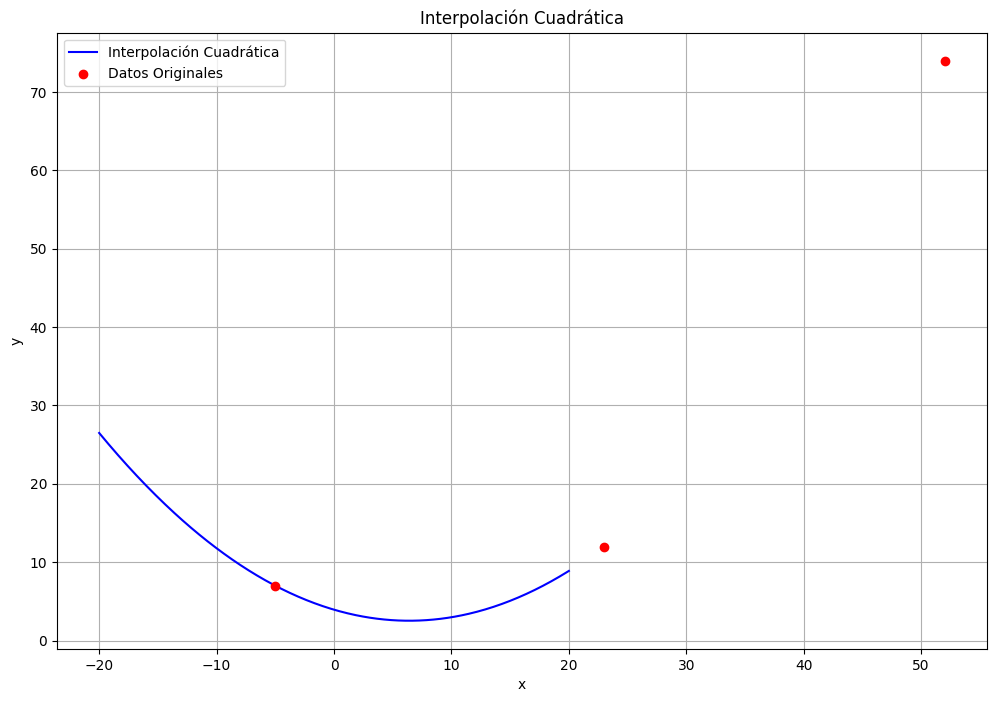

PDF generado: quadratic_interpolation_report.pdf


In [23]:
# Interpolación Cuadrática
# Archivo: quadratic_interpolation_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
from sympy import symbols, lambdify, solve
import os

def quadratic_interpolation(x, y):
    """
    Realiza la interpolación cuadrática basada en tres puntos dados.

    Parámetros:
    x : list - Lista de valores x (debe contener 3 puntos).
    y : list - Lista de valores y correspondientes a x.

    Retorna:
    interpolating_function : function - Función interpolada cuadrática.
    coefficients : tuple - Coeficientes (a, b, c) del polinomio interpolador.
    """
    if len(x) != 3 or len(y) != 3:
        raise ValueError("Se requieren exactamente tres puntos para la interpolación cuadrática.")

    # Coefficients matrix and result vector
    A = np.array([
        [x[0]**2, x[0], 1],
        [x[1]**2, x[1], 1],
        [x[2]**2, x[2], 1]
    ])

    B = np.array([y[0], y[1], y[2]])

    # Solving the system of equations
    coefficients = np.linalg.solve(A, B)

    # Define the interpolating function
    a, b, c = coefficients
    def interpolating_function(x):
        return a*x**2 + b*x + c

    return interpolating_function, coefficients

def generate_value_table(func, x_values):
    """
    Genera una tabla de valores de la función en un conjunto de puntos x.

    Parámetros:
    func : function - Función para evaluar.
    x_values : list - Lista de valores x para evaluar la función.

    Retorna:
    table : list - Lista de tuplas (x, func(x)) que contiene los valores de x y su respectiva evaluación.
    """
    table = [(x, func(x)) for x in x_values]
    return table

def plot_interpolation(original_x, original_y, interp_func, x_min, x_max):
    """
    Grafica la función interpolada y los puntos originales.

    Parámetros:
    original_x : list - Lista de valores x originales.
    original_y : list - Lista de valores y originales.
    interp_func : function - Función interpolada.
    x_min : float - Límite inferior del intervalo para la gráfica.
    x_max : float - Límite superior del intervalo para la gráfica.

    Retorno:
    Guarda el gráfico como 'interpolation_plot.png'.
    """
    x = np.linspace(x_min, x_max, 400)
    y_interp = interp_func(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y_interp, label="Interpolación Cuadrática", color="blue")
    plt.scatter(original_x, original_y, color="red", zorder=5, label="Datos Originales")
    plt.title("Interpolación Cuadrática")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.savefig("interpolation_plot.png")
    plt.show()

def generate_pdf_report(original_x, original_y, interp_func, coefficients, table_values):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y resultados de la interpolación cuadrática.

    Parámetros:
    original_x : list - Lista de valores x originales.
    original_y : list - Lista de valores y originales.
    interp_func : function - Función interpolada.
    coefficients : tuple - Coeficientes (a, b, c) del polinomio interpolador.
    table_values : list - Lista de valores (x, f(x)) generados por la función interpolada.

    Retorno:
    Genera un archivo PDF "quadratic_interpolation_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Interpolación Cuadrática", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Coeficientes de la interpolación cuadrática: a={coefficients[0]:.6f}, b={coefficients[1]:.6f}, c={coefficients[2]:.6f}", ln=True)
    pdf.ln(10)

    # Tabla de valores generados por la interpolación
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Tabla de valores generados por la interpolación:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(40, 10, txt="x", border=1)
    pdf.cell(40, 10, txt="f(x)", border=1)
    pdf.ln(10)

    for x, fx in table_values:
        pdf.cell(40, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{fx:.6e}", border=1)
        pdf.ln(10)

    # Insertar gráfico
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfica de la interpolación cuadrática:", ln=True)
    pdf.ln(5)
    pdf.image("interpolation_plot.png", x=10, y=pdf.get_y(), w=180)

    # Guardar el PDF
    pdf_output = "quadratic_interpolation_report.pdf"
    pdf.output(pdf_output)
    print(f"PDF generado: {pdf_output}")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para la interpolación cuadrática.

    Retorno:
    original_x : list - Lista de valores x originales.
    original_y : list - Lista de valores y originales.
    x_min : float - Límite inferior del intervalo para la gráfica.
    x_max : float - Límite superior del intervalo para la gráfica.
    """
    original_x = []
    original_y = []

    for i in range(3):
        x = float(input(f"Ingrese el valor x{i+1}: "))
        y = float(input(f"Ingrese el valor y{i+1}: "))
        original_x.append(x)
        original_y.append(y)

    x_min = float(input("Ingrese el límite inferior del intervalo para la gráfica: "))
    x_max = float(input("Ingrese el límite superior del intervalo para la gráfica: "))

    return original_x, original_y, x_min, x_max

def main():
    try:
        # Ingresar datos
        original_x, original_y, x_min, x_max = ingresar_datos()

        # Realizar interpolación cuadrática
        interp_func, coefficients = quadratic_interpolation(original_x, original_y)

        # Generar tabla de valores de la función interpolada en el intervalo [x_min, x_max]
        x_values = np.linspace(x_min, x_max, 100)
        table_values = generate_value_table(interp_func, x_values)

        # Generar gráficos
        plot_interpolation(original_x, original_y, interp_func, x_min, x_max)

        # Generar PDF con los resultados
        generate_pdf_report(original_x, original_y, interp_func, coefficients, table_values)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


**Punto fijo**

Ingrese el valor inicial x0: 3
Ingrese la tolerancia: 25
Ingrese el número máximo de iteraciones: 12


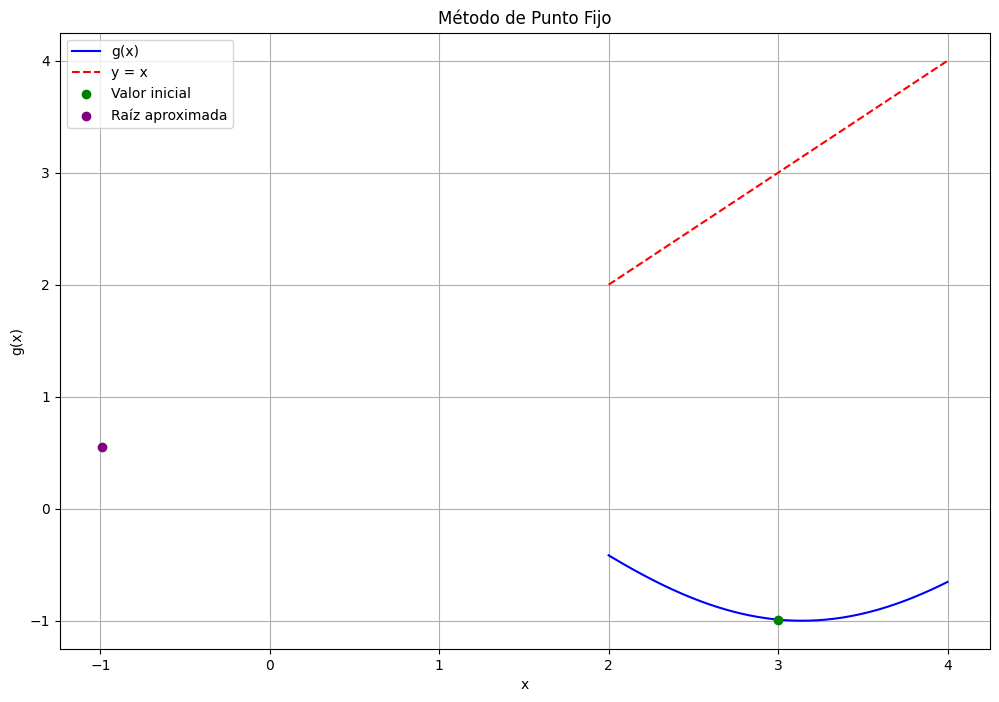

NameError: name 'tol' is not defined

In [25]:
# Método de Punto Fijo
# Archivo: fixed_point_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
import os

def fixed_point_iteration(g, x0, tol, max_iter):
    """
    Aplica el método de punto fijo para encontrar una raíz de la función g(x) = x.

    Parámetros:
    g : function - Función de iteración g(x) = x.
    x0 : float - Valor inicial de la iteración.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    x : float - Valor aproximado de la raíz.
    history : list - Lista de tuplas (iteración, x, g(x), error) para cada iteración.
    """
    x = x0
    history = []

    for i in range(max_iter):
        x_new = g(x)
        error = abs(x_new - x)
        history.append((i+1, x, x_new, error))

        if error < tol:
            return x_new, history

        x = x_new

    return x, history

def plot_fixed_point(g, x0, x_root, tol, max_iter):
    """
    Grafica el proceso de iteración del método de punto fijo.

    Parámetros:
    g : function - Función de iteración g(x) = x.
    x0 : float - Valor inicial de la iteración.
    x_root : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorno:
    Guarda el gráfico como 'fixed_point_plot.png'.
    """
    x = np.linspace(x0 - 1, x0 + 1, 400)
    y = g(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label="g(x)", color="blue")
    plt.plot(x, x, label="y = x", color="red", linestyle="--")
    plt.scatter([x0], [g(x0)], color="green", zorder=5, label="Valor inicial")
    plt.scatter([x_root], [g(x_root)], color="purple", zorder=5, label="Raíz aproximada")
    plt.title("Método de Punto Fijo")
    plt.xlabel("x")
    plt.ylabel("g(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("fixed_point_plot.png")
    plt.show()

def generate_pdf_report(x0, x_root, history):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y resultados del método de punto fijo.

    Parámetros:
    x0 : float - Valor inicial de la iteración.
    x_root : float - Valor aproximado de la raíz.
    history : list - Lista de tuplas (iteración, x, g(x), error) para cada iteración.

    Retorno:
    Genera un archivo PDF "fixed_point_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Punto Fijo", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Valor inicial: x0={x0:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Raíz aproximada: x={x_root:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Tolerancia: {tol}", ln=True)
    pdf.cell(200, 10, txt=f"Máximo de iteraciones: {max_iter}", ln=True)
    pdf.ln(10)

    # Tabla de valores generados por la iteración
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Tabla de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iteración", border=1)
    pdf.cell(40, 10, txt="x", border=1)
    pdf.cell(40, 10, txt="g(x)", border=1)
    pdf.cell(40, 10, txt="Error", border=1)
    pdf.ln(10)

    for i, x, gx, error in history:
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(40, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{gx:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{error:.6e}", border=1)
        pdf.ln(10)

    # Insertar gráfico
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfica del método de punto fijo:", ln=True)
    pdf.ln(5)
    pdf.image("fixed_point_plot.png", x=10, y=pdf.get_y(), w=180)

    # Guardar el PDF
    pdf_output = "fixed_point_report.pdf"
    pdf.output(pdf_output)
    print(f"PDF generado: {pdf_output}")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de punto fijo.

    Retorno:
    x0 : float - Valor inicial de la iteración.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    """
    x0 = float(input("Ingrese el valor inicial x0: "))
    tol = float(input("Ingrese la tolerancia: "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))

    def g(x):
        # Ejemplo de función de iteración, puede ser modificada según el problema
        return np.cos(x)

    return g, x0, tol, max_iter

def main():
    try:
        # Ingresar datos
        g, x0, tol, max_iter = ingresar_datos()

        # Aplicar el método de punto fijo
        x_root, history = fixed_point_iteration(g, x0, tol, max_iter)

        # Generar gráficos
        plot_fixed_point(g, x0, x_root, tol, max_iter)

        # Generar PDF con los resultados
        generate_pdf_report(x0, x_root, history)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


Ingrese el valor inicial x0: 12
Ingrese la tolerancia: 25
Ingrese el número máximo de iteraciones: 41


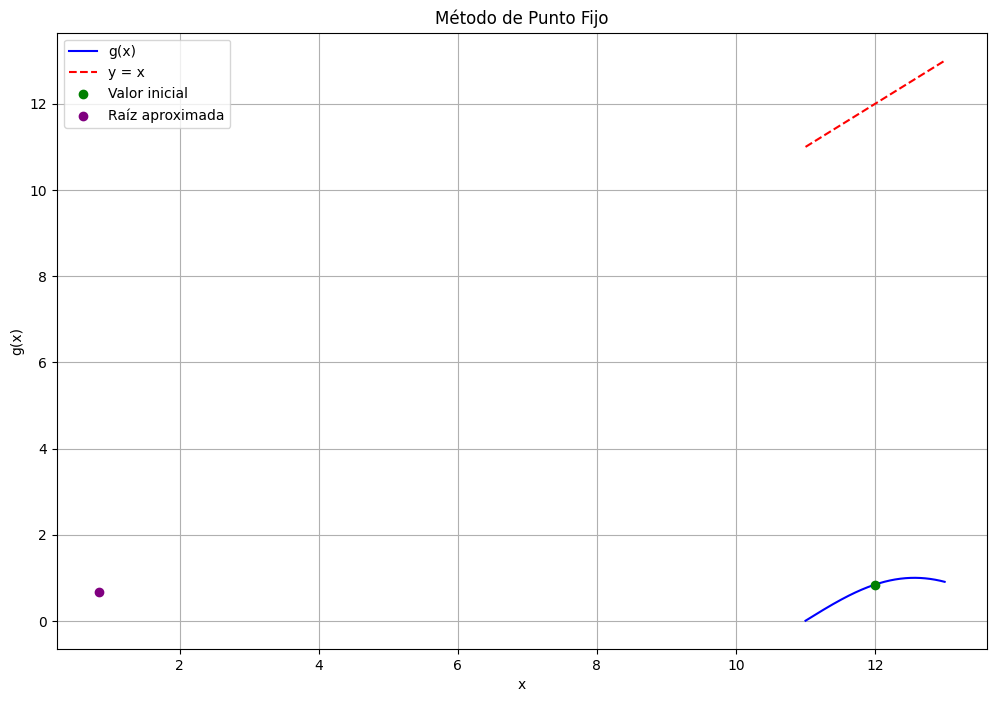

PDF generado: fixed_point_report.pdf


In [27]:
# Método de Punto Fijo
# Archivo: fixed_point_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
import os

def fixed_point_iteration(g, x0, tol, max_iter):
    """
    Aplica el método de punto fijo para encontrar una raíz de la función g(x) = x.

    Parámetros:
    g : function - Función de iteración g(x) = x.
    x0 : float - Valor inicial de la iteración.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    x : float - Valor aproximado de la raíz.
    history : list - Lista de tuplas (iteración, x, g(x), error) para cada iteración.
    """
    x = x0
    history = []

    for i in range(max_iter):
        x_new = g(x)
        error = abs(x_new - x)
        history.append((i+1, x, x_new, error))

        if error < tol:
            return x_new, history

        x = x_new

    return x, history

def plot_fixed_point(g, x0, x_root, tol, max_iter):
    """
    Grafica el proceso de iteración del método de punto fijo.

    Parámetros:
    g : function - Función de iteración g(x) = x.
    x0 : float - Valor inicial de la iteración.
    x_root : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorno:
    Guarda el gráfico como 'fixed_point_plot.png'.
    """
    x = np.linspace(x0 - 1, x0 + 1, 400)
    y = g(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label="g(x)", color="blue")
    plt.plot(x, x, label="y = x", color="red", linestyle="--")
    plt.scatter([x0], [g(x0)], color="green", zorder=5, label="Valor inicial")
    plt.scatter([x_root], [g(x_root)], color="purple", zorder=5, label="Raíz aproximada")
    plt.title("Método de Punto Fijo")
    plt.xlabel("x")
    plt.ylabel("g(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("fixed_point_plot.png")
    plt.show()

def generate_pdf_report(x0, x_root, tol, max_iter, history):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y resultados del método de punto fijo.

    Parámetros:
    x0 : float - Valor inicial de la iteración.
    x_root : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    history : list - Lista de tuplas (iteración, x, g(x), error) para cada iteración.

    Retorno:
    Genera un archivo PDF "fixed_point_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Punto Fijo", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Valor inicial: x0={x0:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Raíz aproximada: x={x_root:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Tolerancia: {tol:.6e}", ln=True)
    pdf.cell(200, 10, txt=f"Máximo de iteraciones: {max_iter}", ln=True)
    pdf.ln(10)

    # Tabla de valores generados por la iteración
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Tabla de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iteración", border=1)
    pdf.cell(40, 10, txt="x", border=1)
    pdf.cell(40, 10, txt="g(x)", border=1)
    pdf.cell(40, 10, txt="Error", border=1)
    pdf.ln(10)

    for i, x, gx, error in history:
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(40, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{gx:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{error:.6e}", border=1)
        pdf.ln(10)

    # Insertar gráfico
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfica del método de punto fijo:", ln=True)
    pdf.ln(5)
    pdf.image("fixed_point_plot.png", x=10, y=pdf.get_y(), w=180)

    # Guardar el PDF
    pdf_output = "fixed_point_report.pdf"
    pdf.output(pdf_output)
    print(f"PDF generado: {pdf_output}")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de punto fijo.

    Retorno:
    x0 : float - Valor inicial de la iteración.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    """
    x0 = float(input("Ingrese el valor inicial x0: "))
    tol = float(input("Ingrese la tolerancia: "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))

    def g(x):
        # Ejemplo de función de iteración, puede ser modificada según el problema
        return np.cos(x)

    return g, x0, tol, max_iter

def main():
    try:
        # Ingresar datos
        g, x0, tol, max_iter = ingresar_datos()

        # Aplicar el método de punto fijo
        x_root, history = fixed_point_iteration(g, x0, tol, max_iter)

        # Generar gráficos
        plot_fixed_point(g, x0, x_root, tol, max_iter)

        # Generar PDF con los resultados
        generate_pdf_report(x0, x_root, tol, max_iter, history)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


**Falsa posición**

In [29]:
# Método de Falsa Posición
# Archivo: false_position_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
import os

def false_position_method(f, a, b, tol, max_iter):
    """
    Aplica el método de falsa posición para encontrar una raíz de la función f(x).

    Parámetros:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    c : float - Valor aproximado de la raíz.
    history : list - Lista de tuplas (iteración, a, b, c, f(c), error) para cada iteración.
    """
    if f(a) * f(b) > 0:
        raise ValueError("El intervalo no contiene una raíz")

    history = []
    c = a
    for i in range(max_iter):
        # Calcula el punto c usando la fórmula de falsa posición
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        error = abs(f(c))

        history.append((i+1, a, b, c, f(c), error))

        if error < tol:
            return c, history

        # Actualiza los límites del intervalo
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return c, history

def plot_false_position(f, a, b, c_root, tol, max_iter):
    """
    Grafica el proceso de iteración del método de falsa posición.

    Parámetros:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    c_root : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorno:
    Guarda el gráfico como 'false_position_plot.png'.
    """
    x = np.linspace(a - 1, b + 1, 400)
    y = f(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label="f(x)", color="blue")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([a, b], [f(a), f(b)], color="green", zorder=5, label="Límites del intervalo")
    plt.scatter([c_root], [f(c_root)], color="purple", zorder=5, label="Raíz aproximada")
    plt.title("Método de Falsa Posición")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("false_position_plot.png")
    plt.show()

def generate_pdf_report(a, b, c_root, tol, max_iter, history):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y resultados del método de falsa posición.

    Parámetros:
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    c_root : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    history : list - Lista de tuplas (iteración, a, b, c, f(c), error) para cada iteración.

    Retorno:
    Genera un archivo PDF "false_position_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Falsa Posición", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Límite inferior: a={a:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Límite superior: b={b:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Raíz aproximada: c={c_root:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Tolerancia: {tol:.6e}", ln=True)
    pdf.cell(200, 10, txt=f"Máximo de iteraciones: {max_iter}", ln=True)
    pdf.ln(10)

    # Tabla de valores generados por la iteración
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Tabla de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iteración", border=1)
    pdf.cell(30, 10, txt="a", border=1)
    pdf.cell(30, 10, txt="b", border=1)
    pdf.cell(30, 10, txt="c", border=1)
    pdf.cell(40, 10, txt="f(c)", border=1)
    pdf.cell(30, 10, txt="Error", border=1)
    pdf.ln(10)

    for i, a, b, c, fc, error in history:
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(30, 10, txt=f"{a:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{b:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{c:.6f}", border=1)
        pdf.cell(40, 10, txt=f"{fc:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{error:.6e}", border=1)
        pdf.ln(10)

    # Insertar gráfico
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfica del método de falsa posición:", ln=True)
    pdf.ln(5)
    pdf.image("false_position_plot.png", x=10, y=pdf.get_y(), w=180)

    # Guardar el PDF
    pdf_output = "false_position_report.pdf"
    pdf.output(pdf_output)
    print(f"PDF generado: {pdf_output}")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de falsa posición.

    Retorno:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    """
    a = float(input("Ingrese el límite inferior del intervalo a: "))
    b = float(input("Ingrese el límite superior del intervalo b: "))
    tol = float(input("Ingrese la tolerancia: "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))

    def f(x):
        # Ejemplo de función, puede ser modificada según el problema
        return x**3 - x - 2

    return f, a, b, tol, max_iter

def main():
    try:
        # Ingresar datos
        f, a, b, tol, max_iter = ingresar_datos()

        # Aplicar el método de falsa posición
        c_root, history = false_position_method(f, a, b, tol, max_iter)

        # Generar gráficos
        plot_false_position(f, a, b, c_root, tol, max_iter)

        # Generar PDF con los resultados
        generate_pdf_report(a, b, c_root, tol, max_iter, history)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


Ingrese el límite inferior del intervalo a: 20
Ingrese el límite superior del intervalo b: 58
Ingrese la tolerancia: 1e-6
Ingrese el número máximo de iteraciones: 20
El intervalo no contiene una raíz


**Búsqueda aleatoria**

In [31]:
# Método de Búsqueda Aleatoria
# Archivo: random_search_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
import os

def random_search_method(f, a, b, tol, max_iter):
    """
    Aplica el método de búsqueda aleatoria para encontrar una raíz de la función f(x).

    Parámetros:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    best_x : float - Valor aproximado de la raíz.
    history : list - Lista de tuplas (iteración, x, f(x), error) para cada iteración.
    """
    history = []
    best_x = a
    best_fx = f(a)

    for i in range(max_iter):
        x = np.random.uniform(a, b)
        fx = f(x)
        error = abs(fx)

        if error < tol:
            best_x = x
            best_fx = fx
            return best_x, history

        if error < abs(best_fx):
            best_x = x
            best_fx = fx

        history.append((i+1, x, fx, error))

    return best_x, history

def plot_random_search(f, a, b, best_x, tol, max_iter):
    """
    Grafica el proceso de iteración del método de búsqueda aleatoria.

    Parámetros:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    best_x : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorno:
    Guarda el gráfico como 'random_search_plot.png'.
    """
    x = np.linspace(a - 1, b + 1, 400)
    y = f(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label="f(x)", color="blue")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([best_x], [f(best_x)], color="red", zorder=5, label="Raíz aproximada")
    plt.title("Método de Búsqueda Aleatoria")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("random_search_plot.png")
    plt.show()

def generate_pdf_report(a, b, best_x, tol, max_iter, history):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y resultados del método de búsqueda aleatoria.

    Parámetros:
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    best_x : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    history : list - Lista de tuplas (iteración, x, f(x), error) para cada iteración.

    Retorno:
    Genera un archivo PDF "random_search_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Búsqueda Aleatoria", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Límite inferior: a={a:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Límite superior: b={b:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Raíz aproximada: x={best_x:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Tolerancia: {tol:.6e}", ln=True)
    pdf.cell(200, 10, txt=f"Máximo de iteraciones: {max_iter}", ln=True)
    pdf.ln(10)

    # Tabla de valores generados por la iteración
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Tabla de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iteración", border=1)
    pdf.cell(40, 10, txt="x", border=1)
    pdf.cell(50, 10, txt="f(x)", border=1)
    pdf.cell(30, 10, txt="Error", border=1)
    pdf.ln(10)

    for i, x, fx, error in history:
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(40, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(50, 10, txt=f"{fx:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{error:.6e}", border=1)
        pdf.ln(10)

    # Insertar gráfico
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfica del método de búsqueda aleatoria:", ln=True)
    pdf.ln(5)
    pdf.image("random_search_plot.png", x=10, y=pdf.get_y(), w=180)

    # Guardar el PDF
    pdf_output = "random_search_report.pdf"
    pdf.output(pdf_output)
    print(f"PDF generado: {pdf_output}")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de búsqueda aleatoria.

    Retorno:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    """
    a = float(input("Ingrese el límite inferior del intervalo a: "))
    b = float(input("Ingrese el límite superior del intervalo b: "))
    tol = float(input("Ingrese la tolerancia: "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))

    def f(x):
        # Ejemplo de función, puede ser modificada según el problema
        return x**2 - 4

    return f, a, b, tol, max_iter

def main():
    try:
        # Ingresar datos
        f, a, b, tol, max_iter = ingresar_datos()

        # Aplicar el método de búsqueda aleatoria
        best_x, history = random_search_method(f, a, b, tol, max_iter)

        # Generar gráficos
        plot_random_search(f, a, b, best_x, tol, max_iter)

        # Generar PDF con los resultados
        generate_pdf_report(a, b, best_x, tol, max_iter, history)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()


KeyboardInterrupt: Interrupted by user

Ingrese el límite inferior del intervalo a: -10
Ingrese el límite superior del intervalo b: 15
Ingrese la tolerancia: 1e-6
Ingrese el número máximo de iteraciones: 25


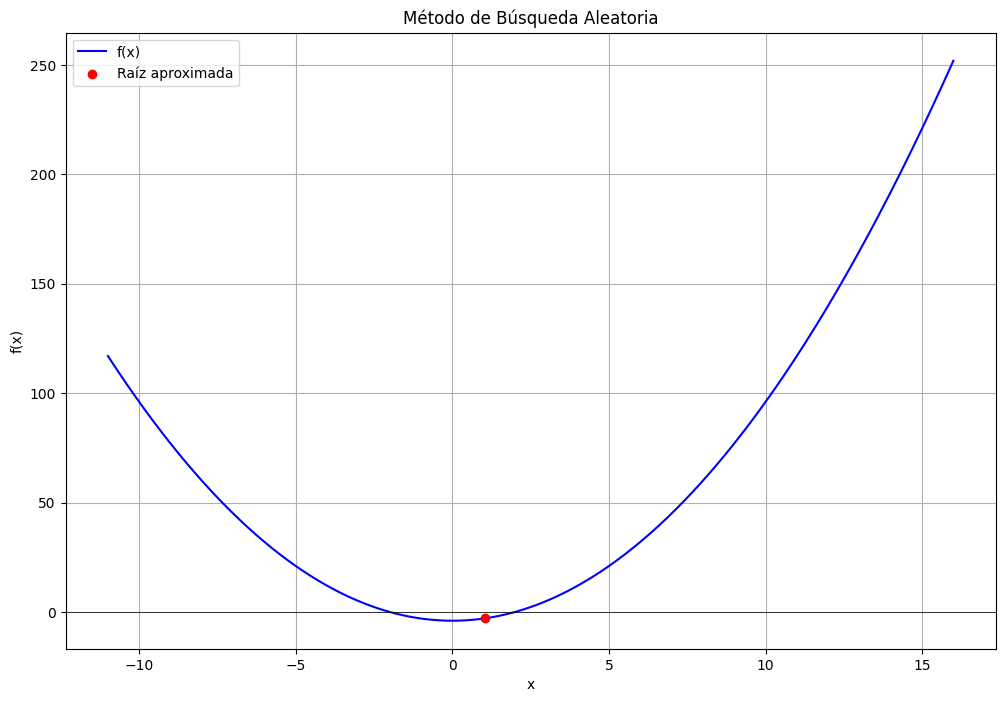

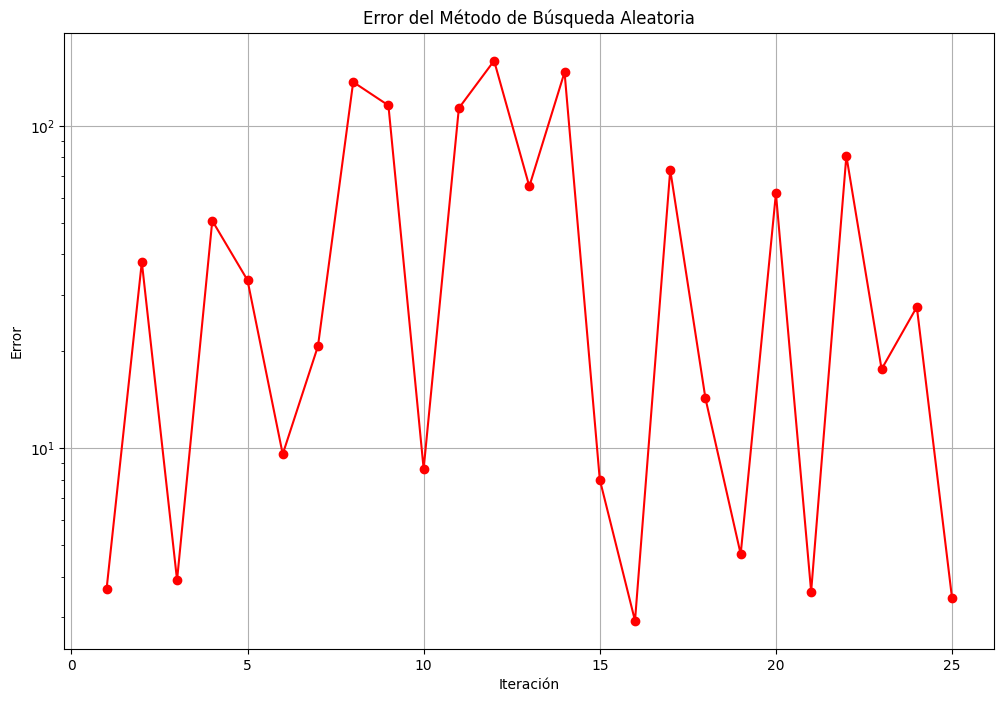

PDF generado: random_search_report.pdf


In [32]:
# Método de Búsqueda Aleatoria
# Archivo: random_search_method.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF
import os

def random_search_method(f, a, b, tol, max_iter):
    """
    Aplica el método de búsqueda aleatoria para encontrar una raíz de la función f(x).

    Parámetros:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorna:
    best_x : float - Valor aproximado de la raíz.
    history : list - Lista de tuplas (iteración, x, f(x), error) para cada iteración.
    """
    history = []
    best_x = a
    best_fx = f(a)

    for i in range(max_iter):
        x = np.random.uniform(a, b)
        fx = f(x)
        error = abs(fx)

        if error < tol:
            best_x = x
            best_fx = fx
            return best_x, history

        if error < abs(best_fx):
            best_x = x
            best_fx = fx

        history.append((i+1, x, fx, error))

    return best_x, history

def plot_random_search(f, a, b, best_x, tol, max_iter):
    """
    Grafica el proceso de iteración del método de búsqueda aleatoria.

    Parámetros:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    best_x : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.

    Retorno:
    Guarda el gráfico como 'random_search_plot.png'.
    """
    x = np.linspace(a - 1, b + 1, 400)
    y = f(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label="f(x)", color="blue")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.scatter([best_x], [f(best_x)], color="red", zorder=5, label="Raíz aproximada")
    plt.title("Método de Búsqueda Aleatoria")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.savefig("random_search_plot.png")
    plt.show()

def plot_error(history):
    """
    Grafica el error del método de búsqueda aleatoria a lo largo de las iteraciones.

    Parámetros:
    history : list - Lista de tuplas (iteración, x, f(x), error) para cada iteración.

    Retorno:
    Guarda el gráfico como 'random_search_error_plot.png'.
    """
    iterations = [entry[0] for entry in history]
    errors = [entry[3] for entry in history]

    plt.figure(figsize=(12, 8))
    plt.plot(iterations, errors, marker='o', linestyle='-', color='red')
    plt.yscale('log')  # Escala logarítmica para mejor visualización del error
    plt.title("Error del Método de Búsqueda Aleatoria")
    plt.xlabel("Iteración")
    plt.ylabel("Error")
    plt.grid(True)
    plt.savefig("random_search_error_plot.png")
    plt.show()

def generate_pdf_report(a, b, best_x, tol, max_iter, history):
    """
    Genera un informe en PDF con las gráficas, tabla de datos y resultados del método de búsqueda aleatoria.

    Parámetros:
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    best_x : float - Valor aproximado de la raíz.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    history : list - Lista de tuplas (iteración, x, f(x), error) para cada iteración.

    Retorno:
    Genera un archivo PDF "random_search_report.pdf" con los resultados.
    """
    pdf = FPDF()
    pdf.add_page()

    # Título
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Informe - Método de Búsqueda Aleatoria", ln=True, align='C')

    # Resultados
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Límite inferior: a={a:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Límite superior: b={b:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Raíz aproximada: x={best_x:.6f}", ln=True)
    pdf.cell(200, 10, txt=f"Tolerancia: {tol:.6e}", ln=True)
    pdf.cell(200, 10, txt=f"Máximo de iteraciones: {max_iter}", ln=True)
    pdf.ln(10)

    # Tabla de valores generados por la iteración
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Tabla de iteraciones:", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=10)
    pdf.cell(30, 10, txt="Iteración", border=1)
    pdf.cell(40, 10, txt="x", border=1)
    pdf.cell(50, 10, txt="f(x)", border=1)
    pdf.cell(30, 10, txt="Error", border=1)
    pdf.ln(10)

    for i, x, fx, error in history:
        pdf.cell(30, 10, txt=f"{i}", border=1)
        pdf.cell(40, 10, txt=f"{x:.6f}", border=1)
        pdf.cell(50, 10, txt=f"{fx:.6f}", border=1)
        pdf.cell(30, 10, txt=f"{error:.6e}", border=1)
        pdf.ln(10)

    # Insertar gráfico de la función
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfica del método de búsqueda aleatoria:", ln=True)
    pdf.ln(5)
    pdf.image("random_search_plot.png", x=10, y=pdf.get_y(), w=180)

    # Insertar gráfico del error
    plot_error(history)
    pdf.ln(10)
    pdf.cell(200, 10, txt="Gráfica del error durante las iteraciones:", ln=True)
    pdf.ln(5)
    pdf.image("random_search_error_plot.png", x=10, y=pdf.get_y(), w=180)

    # Guardar el PDF
    pdf_output = "random_search_report.pdf"
    pdf.output(pdf_output)
    print(f"PDF generado: {pdf_output}")

def ingresar_datos():
    """
    Permite al usuario ingresar los datos necesarios para el método de búsqueda aleatoria.

    Retorno:
    f : function - Función para la cual encontrar la raíz.
    a : float - Límite inferior del intervalo.
    b : float - Límite superior del intervalo.
    tol : float - Tolerancia para el criterio de parada.
    max_iter : int - Número máximo de iteraciones permitidas.
    """
    a = float(input("Ingrese el límite inferior del intervalo a: "))
    b = float(input("Ingrese el límite superior del intervalo b: "))
    tol = float(input("Ingrese la tolerancia: "))
    max_iter = int(input("Ingrese el número máximo de iteraciones: "))

    def f(x):
        # Ejemplo de función, puede ser modificada según el problema
        return x**2 - 4

    return f, a, b, tol, max_iter

def main():
    try:
        # Ingresar datos
        f, a, b, tol, max_iter = ingresar_datos()

        # Aplicar el método de búsqueda aleatoria
        best_x, history = random_search_method(f, a, b, tol, max_iter)

        # Generar gráficos
        plot_random_search(f, a, b, best_x, tol, max_iter)

        # Generar PDF con los resultados
        generate_pdf_report(a, b, best_x, tol, max_iter, history)

    except ValueError as e:
        print(str(e))

if __name__ == "__main__":
    main()
